Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](http://https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
234                               NaN              Mozambique -18.665695   
235                               NaN                   Syria  34.802075   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.916200   
249                          Anguilla          United Kingdom  18.220600   
250            British Virgin Islands          United Kingdom  18.420700   
251          Turks and Caicos Islands          United Kingdom  21.694000   
252                               NaN              MS Zaandam   0.000000   
253                               NaN                Botswana -22.328500   
254                               NaN                 Burundi  -3.37310

## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
235                               NaN              Mozambique -18.665695   
236                               NaN                   Syria  34.802075   
237                               NaN             Timor-Leste  -8.874217   
238                               NaN                  Belize  13.193900   
239                         Recovered                  Canada   0.000000   
240                               NaN                    Laos  19.856270   
241                               NaN                   Libya  26.335100   
242                               NaN      West Bank and Gaza  31.952200   
243                               NaN           Guinea-Bissau  11.803700   
244                               NaN                    Mali  17.570692   
245                               NaN   Saint Kitts and Nevis  17.357822   
246             Northwest Territories                  Canada  64.825500   
247                             Yukon                  Canada  64.282300   
248                               NaN                  Kosovo  42.602636   
249                               NaN                   Burma  21.916200   
250                          Anguilla          United Kingdom  18.220600   
251            British Virgin Islands          United Kingdom  18.420700   
252          Turks and Caicos Islands          United Kingdom  21.694000   
253                               NaN              MS Zaandam   0.000000   
254                               NaN                Botswana -22.328500   
255                               NaN                 Burundi  -3.37310

In [5]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                          Portugal  39.3999  -8.2245   
186            NaN                             Qatar  25.3548  51.1839   
187            NaN                           Romania  45.9432  24.9668   
188            NaN                            Russia  60.0000  90.0000   
189            NaN                            Rwanda  -1.9403  29.8739   
190            NaN                       Saint Lucia  13.9094 -60.9789   
191            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
192            NaN                        San Marino  43.9424  12.4578   
193            NaN                      Saudi Arabia  24.0000  45.0000   
194            NaN                           Senegal  14.4974 -14.4524   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/6/20  \
185        0        0        0        0        0        0  ...     311   
186        0        0        0        0        0        0  ...       4   
187        0        0        0        0        0        0  ...     176   
188        0        0        0        0        0        0  ...      47   
189        0        0        0        0        0        0  ...       0   
190        0        0        0        0        0        0  ...       0   
191        0        0        0        0        0        0  ...       0   
192        0        0        0        0        0        0  ...      32   
193        0        0        0        0        0        0  ...      38   
194        0        0        0        0        0        0  ...       2   

     4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20   Population   \
185     345     380     409      435      470      504      535    10,290,000   
186       6       6       6        6        6        7        7           NaN   
187     197     220     248      270      291      316      331    19,530,000   
188      58      63      76       94      106      130      148   144,500,000   
189       0       0       0        0        0        0        0           NaN   
190       0       0       0        0        0        0        0           NaN   
191       0       0       0        0        0        0        0           NaN   
192      34      34      34       34       35       35       35           NaN   
193      41      41      44       47       52       59       65           NaN   
194       2       2       2        2        2        2        2           NaN   

                                   region  
185                          Portugal_nan  
186                             Qatar_nan  
187                           Romania_nan  
188                            Russia_nan  
189                            Rwanda_nan  
190                       Saint Lucia_nan  
191  Saint Vincent and the Grenadines_nan  
192                        San Marino_nan  
193                      Saudi Arabia_nan  
194                           Senegal_nan  

[10 rows x 89 columns]

In [6]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN          Pakistan  30.3753   69.3451        0        0   
176            NaN            Panama   8.5380  -80.7821        0        0   
177            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
178            NaN          Paraguay -23.4425  -58.4438        0        0   
179            NaN              Peru  -9.1900  -75.0152        0        0   
180            NaN       Philippines  13.0000  122.0000        0        0   
181            NaN            Poland  51.9194   19.1451        0        0   
182            NaN          Portugal  39.3999   -8.2245        0        0   
183            NaN             Qatar  25.3548   51.1839        0        0   
184            NaN           Romania  45.9432   24.9668        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/6/20  4/7/20  4/8/20  4/9/20  \
175        0        0        0        0  ...     259     429     467     572   
176        0        0        0        0  ...      13      14      16      16   
177        0        0        0        0  ...       0       0       0       0   
178        0        0        0        0  ...      12      15      15      18   
179        0        0        0        0  ...     997    1301    1333    1438   
180        0        0        0        0  ...      73      84      96     124   
181        0        0        0        0  ...     162     191     222     284   
182        0        0        0        0  ...     140     184     196     205   
183        0        0        0        0  ...     131     150     178     206   
184        0        0        0        0  ...     406     460     528     647   

     4/10/20  4/11/20  4/12/20  4/13/20   Population                 region  
175      727      762     1028     1095   197,000,000          Pakistan_nan  
176       16       17       23       29           NaN            Panama_nan  
177        0        0        0        0           NaN  Papua New Guinea_nan  
178       18       18       22       22           NaN          Paraguay_nan  
179     1569     1739     1798     2642           NaN              Peru_nan  
180      140      157      197      242   104,900,000       Philippines_nan  
181      318      375      439      487    37,980,000            Poland_nan  
182      233      266      277      277    10,290,000          Portugal_nan  
183      227      247      275      334           NaN             Qatar_nan  
184      729      758      852      914    19,530,000           Romania_nan  

[10 rows x 89 columns]

In [7]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                          Portugal  39.3999  -8.2245   
186            NaN                             Qatar  25.3548  51.1839   
187            NaN                           Romania  45.9432  24.9668   
188            NaN                            Russia  60.0000  90.0000   
189            NaN                            Rwanda  -1.9403  29.8739   
190            NaN                       Saint Lucia  13.9094 -60.9789   
191            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
192            NaN                        San Marino  43.9424  12.4578   
193            NaN                      Saudi Arabia  24.0000  45.0000   
194            NaN                           Senegal  14.4974 -14.4524   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/6/20  \
185        0        0        0        0        0        0  ...   11730   
186        0        0        0        0        0        0  ...    1832   
187        0        0        0        0        0        0  ...    4057   
188        0        0        0        0        0        0  ...    6343   
189        0        0        0        0        0        0  ...     105   
190        0        0        0        0        0        0  ...      14   
191        0        0        0        0        0        0  ...       7   
192        0        0        0        0        0        0  ...     266   
193        0        0        0        0        0        0  ...    2605   
194        0        0        0        0        0        0  ...     226   

     4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20   Population   \
185   12442   13141   13956    15472    15987    16585    16934    10,290,000   
186    2057    2210    2376     2512     2728     2979     3231           NaN   
187    4417    4761    5202     5467     5990     6300     6633    19,530,000   
188    7497    8672   10131    11917    13584    15770    18328   144,500,000   
189     105     110     110      118      120      126      127           NaN   
190      14      14      14       15       15       15       15           NaN   
191       8       8      12       12       12       12       12           NaN   
192     279     279     333      344      356      356      356           NaN   
193    2795    2932    3287     3651     4033     4462     4934           NaN   
194     237     244     250      265      278      280      291           NaN   

                                   region  
185                          Portugal_nan  
186                             Qatar_nan  
187                           Romania_nan  
188                            Russia_nan  
189                            Rwanda_nan  
190                       Saint Lucia_nan  
191  Saint Vincent and the Grenadines_nan  
192                        San Marino_nan  
193                      Saudi Arabia_nan  
194                           Senegal_nan  

[10 rows x 89 columns]

In [8]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
220  Channel Islands  United Kingdom  49.3723   -2.3644        0        0   
221        Gibraltar  United Kingdom  36.1408   -5.3536        0        0   
222      Isle of Man  United Kingdom  54.2361   -4.5481        0        0   
223       Montserrat  United Kingdom  16.7425  -62.1874        0        0   
224              NaN  United Kingdom  55.3781   -3.4360        0        0   
225              NaN         Uruguay -32.5228  -55.7658        0        0   
226              NaN   United States  37.0902  -95.7129        1        1   
227              NaN      Uzbekistan  41.3775   64.5853        0        0   
228              NaN       Venezuela   6.4238  -66.5897        0        0   
229              NaN         Vietnam  16.0000  108.0000        0        2   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/6/20  4/7/20  4/8/20  4/9/20  \
220        0        0        0        0  ...     323     335     351     361   
221        0        0        0        0  ...     109     113     120     123   
222        0        0        0        0  ...     139     150     158     190   
223        0        0        0        0  ...       6       9       9       9   
224        0        0        0        0  ...   51608   55242   60733   65077   
225        0        0        0        0  ...     406     424     424     456   
226        2        2        5        5  ...  366667  396223  429052  461437   
227        0        0        0        0  ...     457     520     545     582   
228        0        0        0        0  ...     165     165     167     171   
229        2        2        2        2  ...     245     249     251     255   

     4/10/20  4/11/20  4/12/20  4/13/20   Population   \
220      398      407      431      436           NaN   
221      127      129      129      129           NaN   
222      201      226      228      242           NaN   
223        9        9        9       11           NaN   
224    73758    78991    84279    88621    66,440,000   
225      473      494      480      480           NaN   
226   496535   526396   555313   580619   327,200,000   
227      624      767      865      998           NaN   
228      171      175      181      189           NaN   
229      257      258      262      265    95,540,000   

                             region  
220  United Kingdom_Channel Islands  
221        United Kingdom_Gibraltar  
222      United Kingdom_Isle of Man  
223       United Kingdom_Montserrat  
224              United Kingdom_nan  
225                     Uruguay_nan  
226               United States_nan  
227                  Uzbekistan_nan  
228                   Venezuela_nan  
229                     Vietnam_nan  

[10 rows x 89 columns]

## Create Time Series + Plots

In [9]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [10]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [11]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

Text(0.5, 1.0, 'Daily Total Recoverd - Major_4,25 2nd Areas')

### Extract Weather Data

In [12]:

#!pip install pyweatherbit

In [13]:

from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#api_key="30b114eb7ebb45069cd287adadf9d3b7" # joao@fuelbigdata.com
#api_key="257c03d853ec4a9db6bd4920be591f3c" # jpacerqueira.consult.bigdata@gmail.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090"

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [14]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [15]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

start_date_init='2020-04-12'
offset_days=0 #-1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=2

my_weather_fetch_list= my_train_list # ['Iran_nan'] #['Brazil_nan'] #

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

TypeError: can only concatenate str (not "float") to str

In [17]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [18]:
w[:]

date                     region   min   max
0   2020/04/13  Australia_New South Wales  13.2  19.4
1   2020/04/13                Belgium_nan   5.0  25.0
2   2020/04/13                 Brazil_nan  21.0  30.6
3   2020/04/13             Canada_Ontario  -3.7   3.0
4   2020/04/13              China_Beijing   8.0  27.0
5   2020/04/13            China_Guangdong  14.0  24.0
6   2020/04/13            China_Hong Kong  14.4  21.1
7   2020/04/13                China_Hubei   6.0  21.0
8   2020/04/13                China_Macau  17.0  23.0
9   2020/04/13             China_Shanghai   8.2  20.0
10  2020/04/13                Finland_nan  -5.6   1.7
11  2020/04/13                Finland_nan  -5.6   1.7
12  2020/04/13                 France_nan  11.0  21.4
13  2020/04/13                Germany_nan   2.0  23.0
14  2020/04/13                  India_nan  25.0  40.1
15  2020/04/13                   Iran_nan  12.0  19.0
16  2020/04/13                  Italy_nan   8.7  21.7
17  2020/04/13                  Japan_nan   0.6   9.6
18  2020/04/13           Korea, South_nan   0.0  15.0
19  2020/04/13               Malaysia_nan  24.0  33.0
20  2020/04/13            Netherlands_nan  11.1  25.0
21  2020/04/13                 Norway_nan  -7.8   2.2
22  2020/04/13            Philippines_nan  24.4  30.6
23  2020/04/13                 Poland_nan   5.0  20.0
24  2020/04/13               Portugal_nan  12.2  19.2
25  2020/04/13                 Russia_nan  -5.0  11.0
26  2020/04/13              Singapore_nan  26.5  32.0
27  2020/04/13                  Spain_nan   9.5  20.3
28  2020/04/13                 Sweden_nan   1.1  11.1
29  2020/04/13            Switzerland_nan   9.9  19.0
..         ...                        ...   ...   ...
40  2020/04/14            China_Guangdong  12.0  24.0
41  2020/04/14            China_Hong Kong  13.1  21.7
42  2020/04/14                China_Hubei   8.0  24.0
43  2020/04/14                China_Macau  17.0  22.0
44  2020/04/14             China_Shanghai   9.2  21.9
45  2020/04/14                Finland_nan  -1.1   2.8
46  2020/04/14                Finland_nan  -1.1   2.8
47  2020/04/14                 France_nan   8.8  15.7
48  2020/04/14                Germany_nan   6.0  10.0
49  2020/04/14                  India_nan  25.0  38.0
50  2020/04/14                   Iran_nan   5.0  16.0
51  2020/04/14                  Italy_nan  10.0  16.7
52  2020/04/14                  Japan_nan   2.2   6.0
53  2020/04/14           Korea, South_nan   2.3  14.9
54  2020/04/14               Malaysia_nan  23.9  33.0
55  2020/04/14            Netherlands_nan  10.6  17.2
56  2020/04/14                 Norway_nan  -9.4  -7.2
57  2020/04/14            Philippines_nan  25.6  31.1
58  2020/04/14                 Poland_nan   8.9  15.6
59  2020/04/14               Portugal_nan  11.1  12.9
60  2020/04/14                 Russia_nan  -5.0  15.0
61  2020/04/14              Singapore_nan  27.5  34.0
62  2020/04/14                  Spain_nan   9.8  14.1
63  2020/04/14                 Sweden_nan   0.0   2.2
64  2020/04/14            Switzerland_nan   8.1  14.5
65  2020/04/14                Taiwan*_nan  10.9  24.0
66  2020/04/14                 Turkey_nan   0.4  10.6
67  2020/04/14         United Kingdom_nan   2.8   3.9
68  2020/04/14          United States_nan   1.0   2.0
69  2020/04/14                Vietnam_nan  21.0  24.0

[70 rows x 4 columns]

In [16]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

## Kalman Filter With R

In [17]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 20/02 as
### they are too in the Past and model no longuer trains in China Hubei

ts=ts[29:]
ts_d=ts_d[29:]
ts_rec=ts_rec[29:]

In [18]:
ts[:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/20/20                0            0            0            0           0   
2/21/20                0            0            0            0           0   
2/22/20                0            0            0            0           0   
2/23/20                0            0            0            0           0   
2/24/20                1            0            0            0           0   
2/25/20                1            0            1            0           0   
2/26/20                1            0            1            0           0   
2/27/20                1            0            1            0           0   
2/28/20                1            0            1            0           0   
2/29/20                1            0            1            0           0   
3/1/20                 1            0            1            0           0   
3/2/20                 1            0            3            1           0   
3/3/20                 1            0            5            1           0   
3/4/20                 1            0           12            1           0   
3/5/20                 1            0           12            1           0   
3/6/20                 1            0           17            1           0   
3/7/20                 1            0           17            1           0   
3/8/20                 4            0           19            1           0   
3/9/20                 4            2           20            1           0   
3/10/20                5           10           20            1           0   
3/11/20                7           12           20            1           0   
3/12/20                7           23           24            1           0   
3/13/20                7           33           26            1           0   
3/14/20               11           38           37            1           0   
3/15/20               16           42           48            1           0   
3/16/20               21           51           54            2           0   
3/17/20               22           55           60           39           0   
3/18/20               22           59           74           39           0   
3/19/20               22           64           87           53           0   
3/20/20               24           70           90           75           1   
3/21/20               24           76          139           88           2   
3/22/20               40           89          201          113           2   
3/23/20               40          104          230          133           3   
3/24/20               74          123          264          164           3   
3/25/20               84          146          302          188           3   
3/26/20               94          174          367          224           4   
3/27/20              110          186          409          267           4   
3/28/20              110          197          454          308           5   
3/29/20              120          212          511          334           7   
3/30/20              170          223          584          370           7   
3/31/20              174          243          716          376           7   
4/1/20               237          259          847          390           8   
4/2/20               273          277          986          428           8   
4/3/20               281          304         1171          439           8   
4/4/20               299          333         1251          466          10   
4/5/20               349          361         1320          501          14   
4/6/20               367          377         1423          525          16   
4/7/20               423          383         1468          545          17   
4/8/20               444          400         1572          564          19   
4/9/20               484          409         1666

In [19]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [20]:
#!pip install rpy2


In [21]:
import rpy2
%load_ext rpy2.ipython

In [22]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [23]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [24]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [25]:
p=%R pred_all

In [26]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

In [27]:
temp[:]

date           region  confirmed     Y          X      X2
0     2020-02-20  Afghanistan_nan          0   0.0   0.000000  0.0000
1     2020-02-21  Afghanistan_nan          0   0.0   0.000000  0.0000
2     2020-02-22  Afghanistan_nan          0   0.0   0.000000  0.0000
3     2020-02-23  Afghanistan_nan          0   0.0   0.000000  0.0000
4     2020-02-24  Afghanistan_nan          1   1.0   0.000000  0.0000
5     2020-02-25  Afghanistan_nan          1   1.0   0.829164  0.4896
6     2020-02-26  Afghanistan_nan          1   1.0   1.173575  0.5572
7     2020-02-27  Afghanistan_nan          1   1.0   1.308386  0.4961
8     2020-02-28  Afghanistan_nan          1   1.0   1.335020  0.3932
9     2020-02-29  Afghanistan_nan          1   1.0   1.302954  0.2833
10    2020-03-01  Afghanistan_nan          1   1.0   1.242967  0.1841
11    2020-03-02  Afghanistan_nan          1   1.0   1.175804  0.1045
12    2020-03-03  Afghanistan_nan          1   1.0   1.114305  0.0468
13    2020-03-04  Afghanistan_nan          1   1.0   1.064808  0.0093
14    2020-03-05  Afghanistan_nan          1   1.0   1.028990 -0.0120
15    2020-03-06  Afghanistan_nan          1   1.0   1.005717 -0.0215
16    2020-03-07  Afghanistan_nan          1   1.0   0.992530 -0.0233
17    2020-03-08  Afghanistan_nan          4   4.0   0.986636 -0.0209
18    2020-03-09  Afghanistan_nan          4   4.0   2.836291  0.9669
19    2020-03-10  Afghanistan_nan          5   5.0   3.989300  1.3483
20    2020-03-11  Afghanistan_nan          7   7.0   5.219561  1.6796
21    2020-03-12  Afghanistan_nan          7   7.0   7.073759  2.2633
22    2020-03-13  Afghanistan_nan          7   7.0   8.046721  2.2391
23    2020-03-14  Afghanistan_nan         11  11.0   8.408578  1.8960
24    2020-03-15  Afghanistan_nan         16  16.0  10.860422  2.7454
25    2020-03-16  Afghanistan_nan         21  21.0  15.266484  4.4301
26    2020-03-17  Afghanistan_nan         22  22.0  20.797066  6.3095
27    2020-03-18  Afghanistan_nan         22  22.0  24.378445  6.7038
28    2020-03-19  Afghanistan_nan         22  22.0  25.927900  5.9242
29    2020-03-20  Afghanistan_nan         24  24.0  26.170656  4.6367
...          ...              ...        ...   ...        ...     ...
14490 2020-03-16     Zimbabwe_nan          0   0.0   0.000000  0.0000
14491 2020-03-17     Zimbabwe_nan          0   0.0   0.000000  0.0000
14492 2020-03-18     Zimbabwe_nan          0   0.0   0.000000  0.0000
14493 2020-03-19     Zimbabwe_nan          0   0.0   0.000000  0.0000
14494 2020-03-20     Zimbabwe_nan          1   1.0   0.000000  0.0000
14495 2020-03-21     Zimbabwe_nan          3   3.0   0.616903  0.3278
14496 2020-03-22     Zimbabwe_nan          3   3.0   2.234549  1.1089
14497 2020-03-23     Zimbabwe_nan          3   3.0   3.205785  1.3599
14498 2020-03-24     Zimbabwe_nan          3   3.0   3.690772  1.2924
14499 2020-03-25     Zimbabwe_nan          3   3.0   3.846214  1.0660
14500 2020-03-26     Zimbabwe_nan          3   3.0   3.803870  0.7886
14501 2020-03-27     Zimbabwe_nan          5   5.0   3.662827  0.5251
14502 2020-03-28     Zimbabwe_nan          7   7.0   4.724024  0.9634
14503 2020-03-29     Zimbabwe_nan          7   7.0   6.561613  1.7094
14504 2020-03-30     Zimbabwe_nan          7   7.0   7.601308  1.8531
14505 2020-03-31     Zimbabwe_nan          8   8.0   8.064276  1.6560
14506 2020-04-01     Zimbabwe_nan          8   8.0   8.769844  1.6350
14507 2020-04-02     Zimbabwe_nan          9   9.0   9.030664  1.3826
14508 2020-04-03     Zimbabwe_nan          9   9.0   9.633930  1.3726
14509 2020-04-04     Zimbabwe_nan          9   9.0   9.860516  1.1648
14510 2020-04-05     Zimbabwe_nan          9   9.0   9.853812  0.8827
14511 2020-04-06     Zimbabwe_nan         10  10.0   9.724312  0.6028
14512 2020-04-07     Zimbabwe_nan         11  11.0  10.165662  0.6932
14513 2020-04-08     Zimbabwe_nan         11  11.0  10.992311  0.9667
14514 2020-04-09     Zimbabwe_nan         11  11.0  11.432067  0.9692
14515 2020-04-10     Z

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [28]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

#w_1_total=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#w_1_total['date']=pd.to_datetime(w_1_total['date'],format='%Y/%m/%d')
w_v2_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [29]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2) # w_1_total.append(w_v2) #
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [30]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [31]:
w_in_model.tail(10)

date       region   min   max
5951 2020-04-06  Vietnam_nan  25.0  32.0
5952 2020-04-07  Vietnam_nan  24.0  30.0
5953 2020-04-08  Vietnam_nan  24.0  28.0
5954 2020-04-09  Vietnam_nan  24.0  28.0
5955 2020-04-10  Vietnam_nan  24.0  30.0
5956 2020-04-11  Vietnam_nan  24.0  30.0
5957 2020-04-12  Vietnam_nan  25.0  32.0
5958 2020-04-13  Vietnam_nan  22.0  33.0
5959 2020-04-14  Vietnam_nan  21.0  24.0
5960 2020-04-15  Vietnam_nan  22.0  27.0

### Build Train Set Data Structure

In [32]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [33]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


In [34]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
5     2020-02-25  Afghanistan_nan          1             1             1   
6     2020-02-26  Afghanistan_nan          1             0             1   
7     2020-02-27  Afghanistan_nan          1             0             1   
8     2020-02-28  Afghanistan_nan          1             0             0   
9     2020-02-29  Afghanistan_nan          1             0             0   
10    2020-03-01  Afghanistan_nan          1             0             0   
11    2020-03-02  Afghanistan_nan          1             0             0   
12    2020-03-03  Afghanistan_nan          1             0             0   
13    2020-03-04  Afghanistan_nan          1             0             0   
14    2020-03-05  Afghanistan_nan          1             0             0   
15    2020-03-06  Afghanistan_nan          1             0             0   
16    2020-03-07  Afghanistan_nan          1             0             0   
17    2020-03-08  Afghanistan_nan          4             0             0   
18    2020-03-09  Afghanistan_nan          4             3             3   
19    2020-03-10  Afghanistan_nan          5             0             3   
20    2020-03-11  Afghanistan_nan          7             1             4   
21    2020-03-12  Afghanistan_nan          7             2             3   
22    2020-03-13  Afghanistan_nan          7             0             3   
23    2020-03-14  Afghanistan_nan         11             0             2   
24    2020-03-15  Afghanistan_nan         16             4             4   
25    2020-03-16  Afghanistan_nan         21             5             9   
26    2020-03-17  Afghanistan_nan         22             5            14   
27    2020-03-18  Afghanistan_nan         22             1            11   
28    2020-03-19  Afghanistan_nan         22             0             6   
29    2020-03-20  Afghanistan_nan         24             0             1   
30    2020-03-21  Afghanistan_nan         24             2             2   
31    2020-03-22  Afghanistan_nan         40             0             2   
32    2020-03-23  Afghanistan_nan         40            16            18   
33    2020-03-24  Afghanistan_nan         74             0            16   
34    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
14515 2020-04-10       Zambia_nan         40             0             0   
14516 2020-04-11       Zambia_nan         40             1             1   
14517 2020-04-12       Zambia_nan         43             0             1   
14518 2020-04-13       Zambia_nan         45             3             4   
14519 2020-04-14       Zambia_nan          0             2             5   
14550 2020-03-21     Zimbabwe_nan          3             1             1   
14551 2020-03-22     Zimbabwe_nan          3             2             3   
14552 2020-03-23     Zimbabwe_nan          3             0             3   
14553 2020-03-24     Zimbabwe_nan          3             0             2   
14554 2020-03-25     Zimbabwe_nan          3             0             0   
14555 2020-03-26     Zimbabwe_nan          3             0             0   
14556 2020-03-27     Zimbabwe_nan          5             0             0   
14557 2020-03-28     Zimbabwe_nan          7             2             2   
14558 2020-03-29     Zimbabwe_nan          7             2             4   
14559 2020-03-30     Zimbabwe_nan          7             0             4   
14560 2020-03-31     Zimbabwe_nan          8             0             2   
14561 2020-04-01     Zimbabwe_nan          8             1             1   
14562 2020-04-02     Zimbabwe_nan          9             0             1   
14563 2020-04-03     Zimbabwe_nan          9             1             2   
14564 2020-04-04     Zimbabwe_nan          9             0             1   
14565 2020-04-05     Zimbabwe_nan          9             0  

In [45]:
train.to_csv(r'data/train.csv', index = False, header=True)

In [35]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [36]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date        region  confirmed  1_day_change  3_day_change  \
55    2020-02-20   Albania_nan          0             0             0   
56    2020-02-21   Albania_nan          0             0             0   
57    2020-02-22   Albania_nan          0             0             0   
58    2020-02-23   Albania_nan          0             0             0   
59    2020-02-24   Albania_nan          0             0             0   
60    2020-02-25   Albania_nan          0             0             0   
61    2020-02-26   Albania_nan          0             0             0   
62    2020-02-27   Albania_nan          0             0             0   
63    2020-02-28   Albania_nan          0             0             0   
64    2020-02-29   Albania_nan          0             0             0   
65    2020-03-01   Albania_nan          0             0             0   
66    2020-03-02   Albania_nan          0             0             0   
67    2020-03-03   Albania_nan          0             0             0   
68    2020-03-04   Albania_nan          0             0             0   
69    2020-03-05   Albania_nan          0             0             0   
70    2020-03-06   Albania_nan          0             0             0   
71    2020-03-07   Albania_nan          0             0             0   
72    2020-03-08   Albania_nan          0             0             0   
73    2020-03-09   Albania_nan          2             0             0   
74    2020-03-10   Albania_nan         10             2             2   
75    2020-03-11   Albania_nan         12             8            10   
76    2020-03-12   Albania_nan         23             2            12   
77    2020-03-13   Albania_nan         33            11            21   
78    2020-03-14   Albania_nan         38            10            23   
79    2020-03-15   Albania_nan         42             5            26   
80    2020-03-16   Albania_nan         51             4            19   
81    2020-03-17   Albania_nan         55             9            18   
82    2020-03-18   Albania_nan         59             4            17   
83    2020-03-19   Albania_nan         64             4            17   
84    2020-03-20   Albania_nan         70             5            13   
...          ...           ...        ...           ...           ...   
14545 2020-03-16  Zimbabwe_nan          0             0             0   
14546 2020-03-17  Zimbabwe_nan          0             0             0   
14547 2020-03-18  Zimbabwe_nan          0             0             0   
14548 2020-03-19  Zimbabwe_nan          0             0             0   
14549 2020-03-20  Zimbabwe_nan          1             0             0   
14550 2020-03-21  Zimbabwe_nan          3             1             1   
14551 2020-03-22  Zimbabwe_nan          3             2             3   
14552 2020-03-23  Zimbabwe_nan          3             0             3   
14553 2020-03-24  Zimbabwe_nan          3             0             2   
14554 2020-03-25  Zimbabwe_nan          3             0             0   
14555 2020-03-26  Zimbabwe_nan          3             0             0   
14556 2020-03-27  Zimbabwe_nan          5             0             0   
14557 2020-03-28  Zimbabwe_nan          7             2             2   
14558 2020-03-29  Zimbabwe_nan          7             2             4   
14559 2020-03-30  Zimbabwe_nan          7             0             4   
14560 2020-03-31  Zimbabwe_nan          8             0             2   
14561 2020-04-01  Zimbabwe_nan          8             1             1   
14562 2020-04-02  Zimbabwe_nan          9             0             1   
14563 2020-04-03  Zimbabwe_nan          9             1             2   
14564 2020-04-04  Zimbabwe_nan          9             0             1   
14565 2020-04-05  Zimbabwe_nan          9             0             1   
14566 2020-04-06  Zimbabwe_nan         10             0             0   
14567 2020-04-07  Zimbabwe_nan         11             1             1 

## Kalman 1 day Prediction with Evaluation

        region           mse         rmse          mae
149  Italy_nan  4.988182e+08  22334.23809  4068.740741


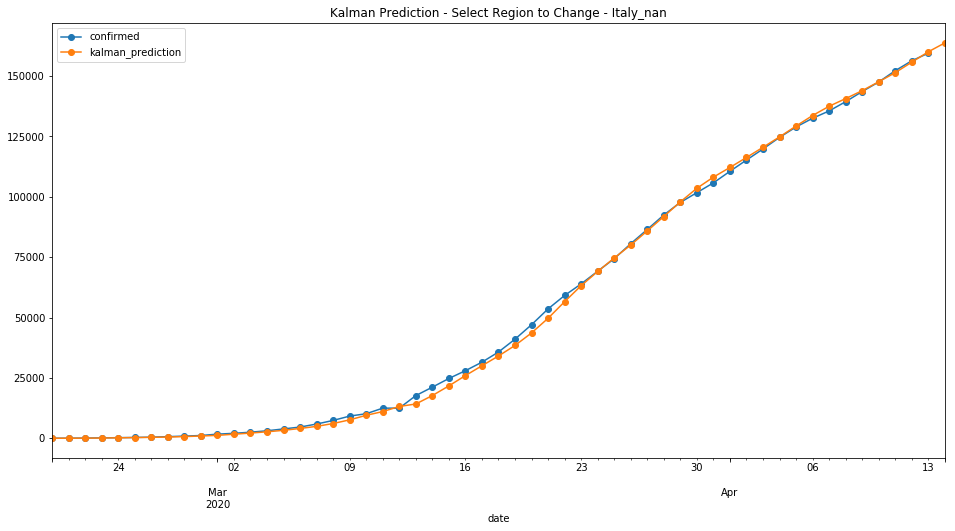

In [46]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
225  Spain_nan  5.787419e+08  24057.055709  4709.074074


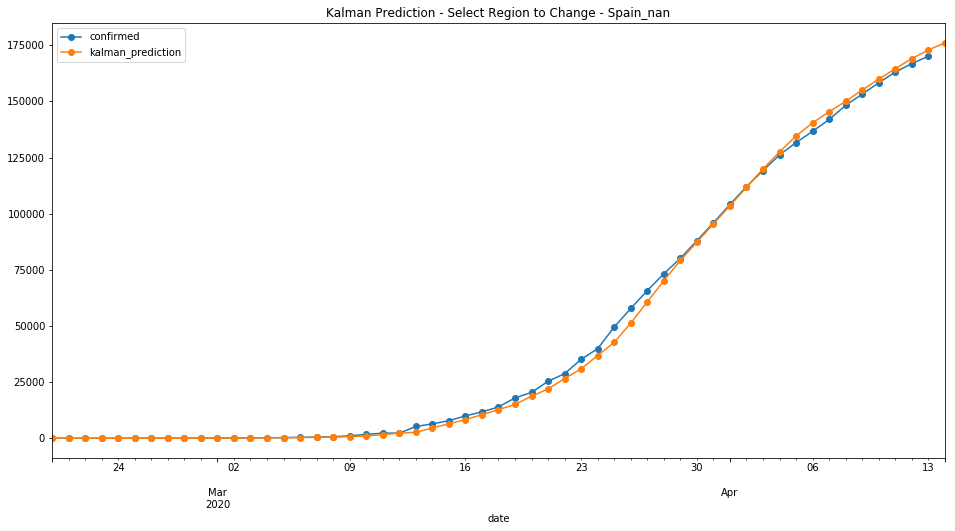

In [47]:
# Select region
region='Spain_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
253  United Kingdom_nan  1.672793e+08  12933.648417  2494.074074


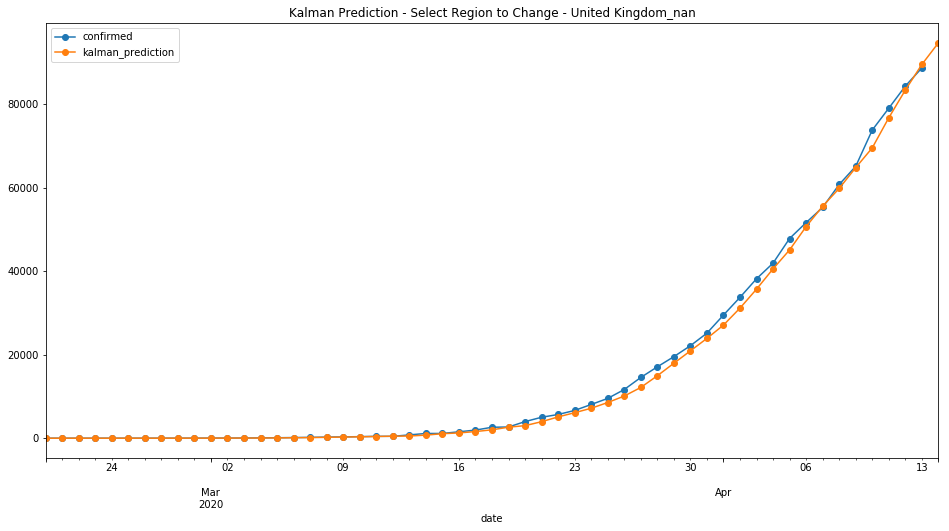

In [48]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                region           mse          rmse           mae
254  United States_nan  7.061106e+09  84030.387058  15654.518519


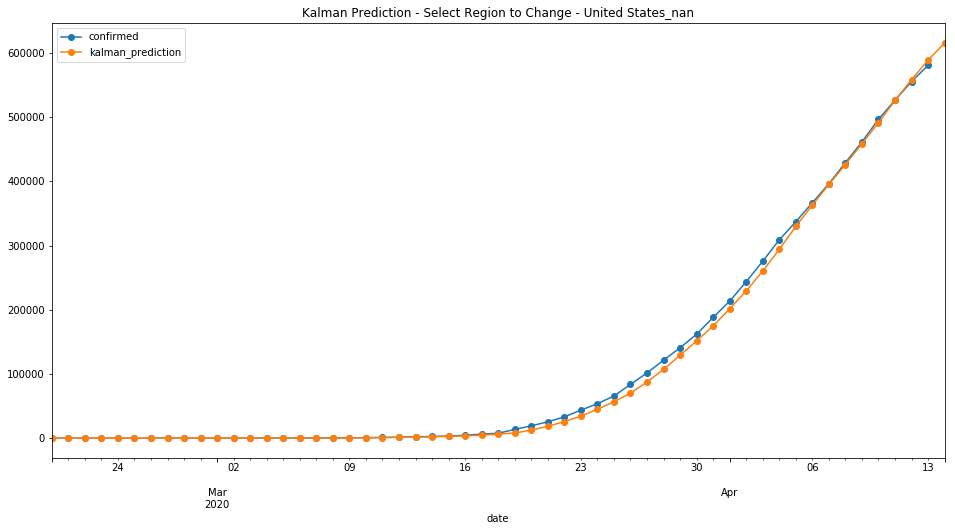

In [49]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

          region           mse          rmse          mae
130  Germany_nan  3.406930e+08  18457.871139  3616.351852


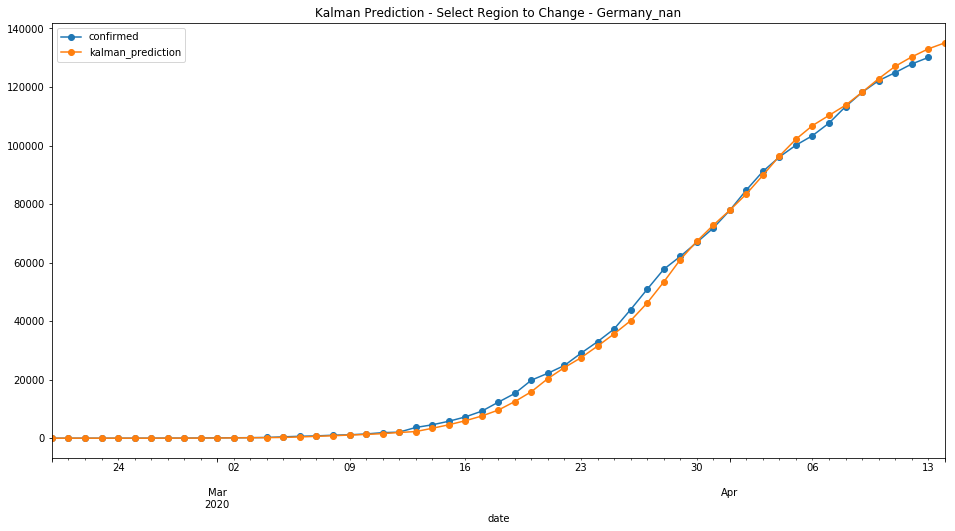

In [50]:
# Select region
region='Germany_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
126  France_nan  3.971690e+08  19929.099551  4355.222222


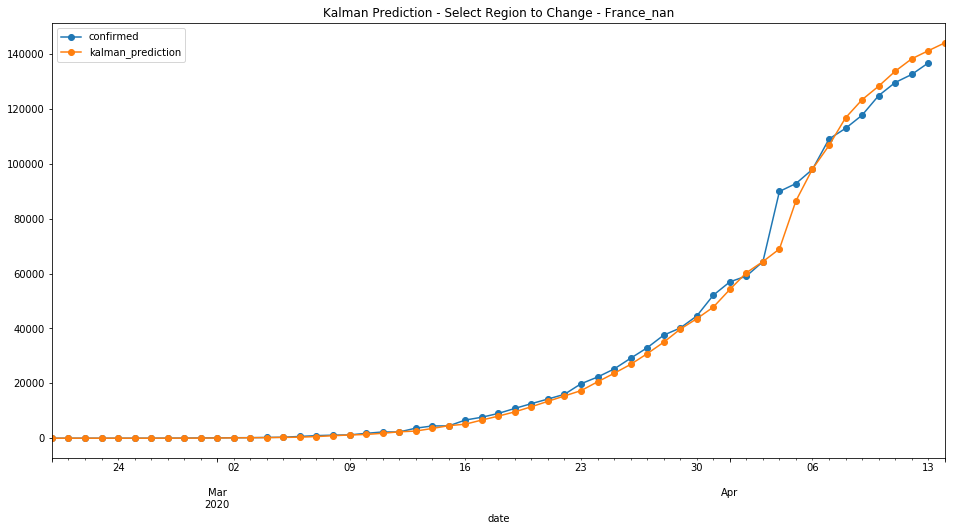

In [51]:
# Select region
region='France_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

              region           mse         rmse         mae
230  Switzerland_nan  1.315376e+07  3626.811639  719.814815


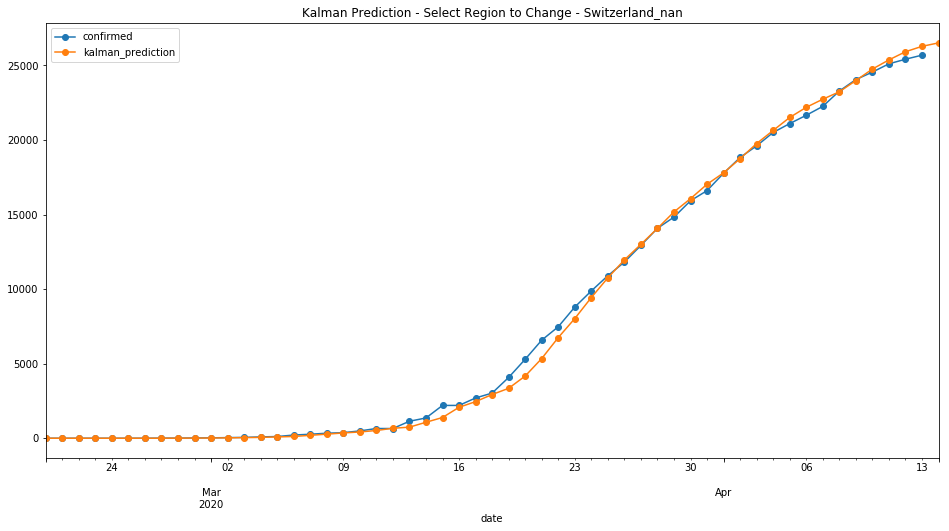

In [52]:
# Select region
region='Switzerland_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse         mae
16  Austria_nan  3.905738e+06  1976.293964  440.055556


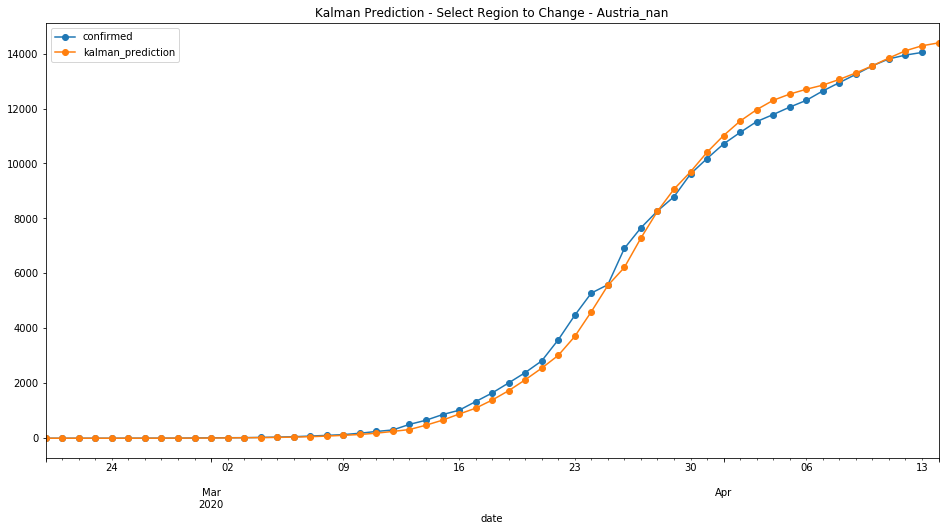

In [53]:
# Select region
region='Austria_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse          mae
239  Turkey_nan  8.002892e+07  8945.888287  1786.759259


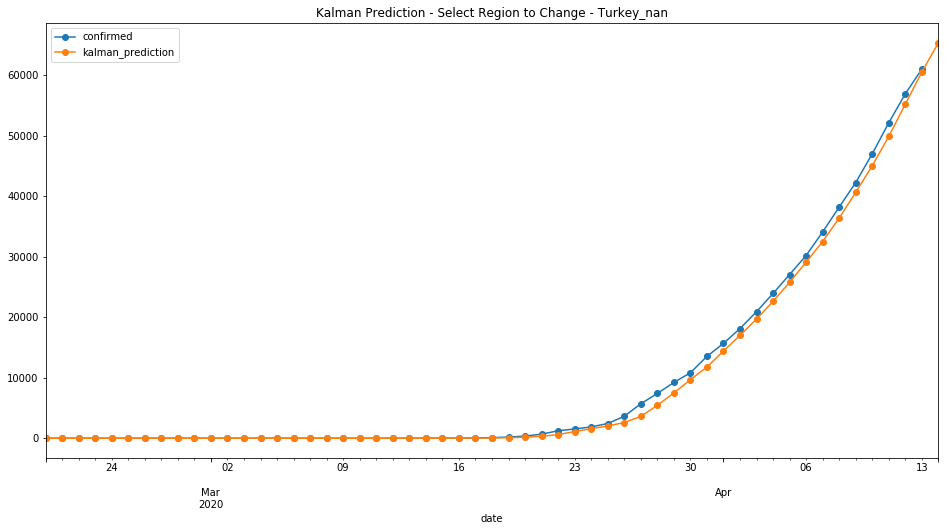

In [54]:
# Select region
region='Turkey_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region         mse         rmse         mae
30  Brazil_nan  11957329.0  3457.937102  700.037037


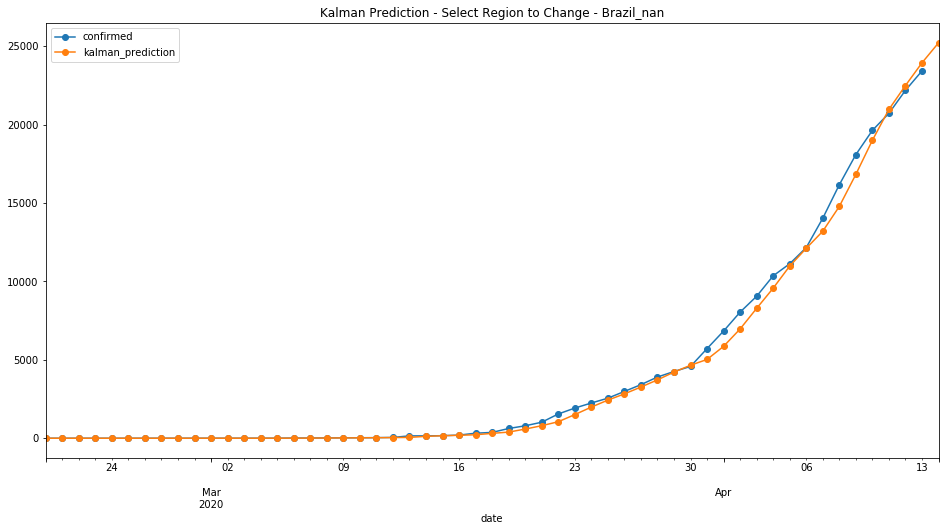

In [55]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

           region           mse         rmse         mae
204  Portugal_nan  6.038132e+06  2457.261051  487.574074


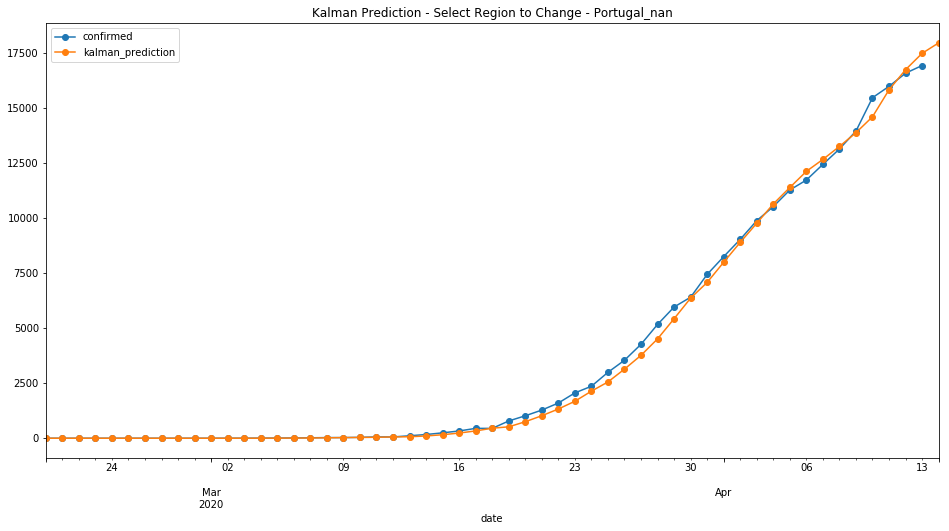

In [56]:
# Select region
region='Portugal_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

               region           mse         rmse         mae
155  Korea, South_nan  2.134680e+06  1461.054281  352.388889


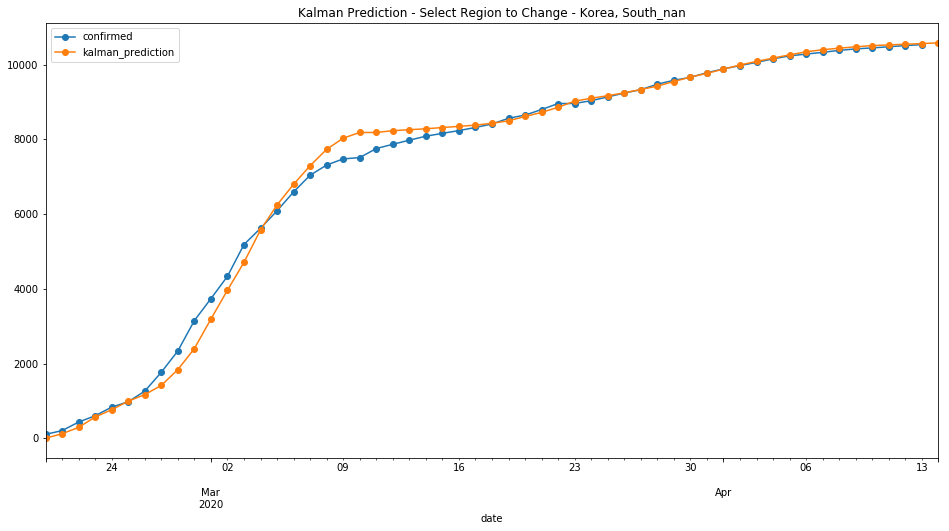

In [57]:
# Select region
region='Korea, South_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

       region           mse          rmse          mae
145  Iran_nan  1.058043e+08  10286.119709  1971.296296


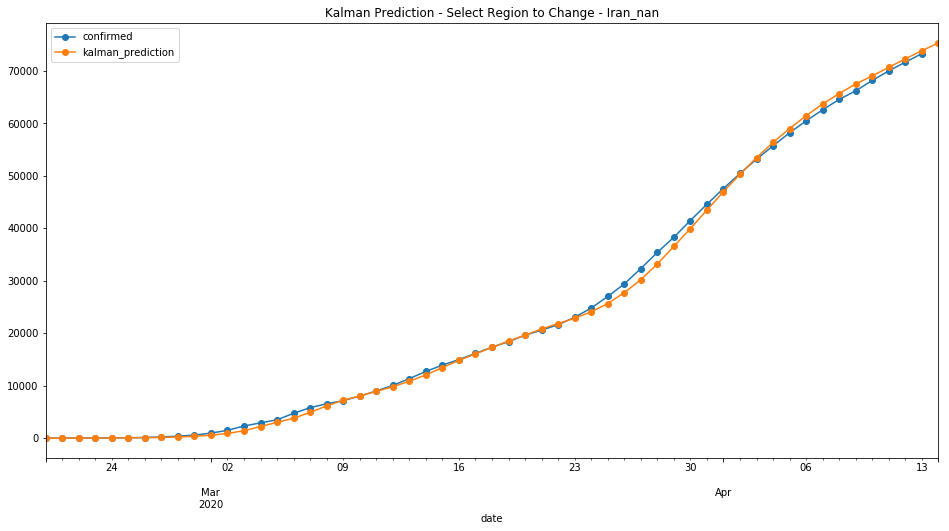

In [58]:
# Select region
region='Iran_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse         mae
229  Sweden_nan  2.494239e+06  1579.316032  309.240741


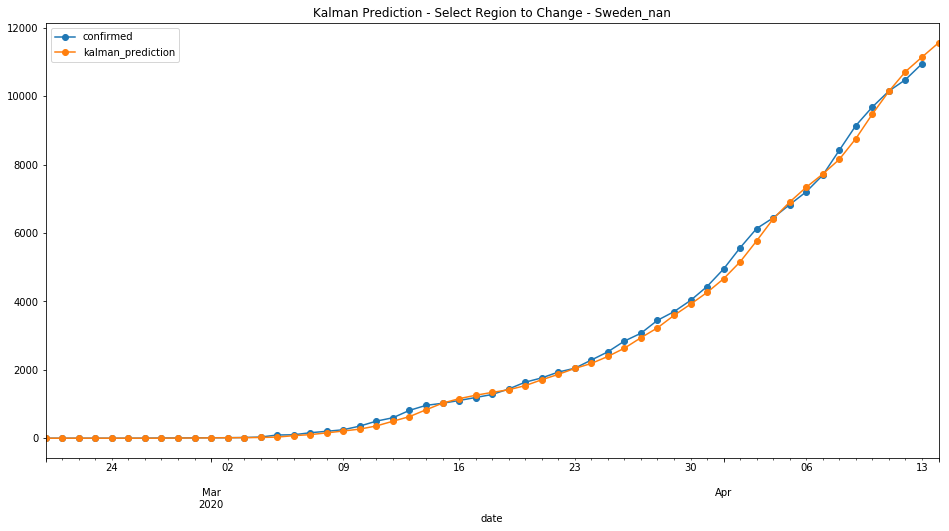

In [59]:
# Select region
region='Sweden_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

              region           mse         rmse         mae
189  Netherlands_nan  1.432335e+07  3784.619926  691.388889


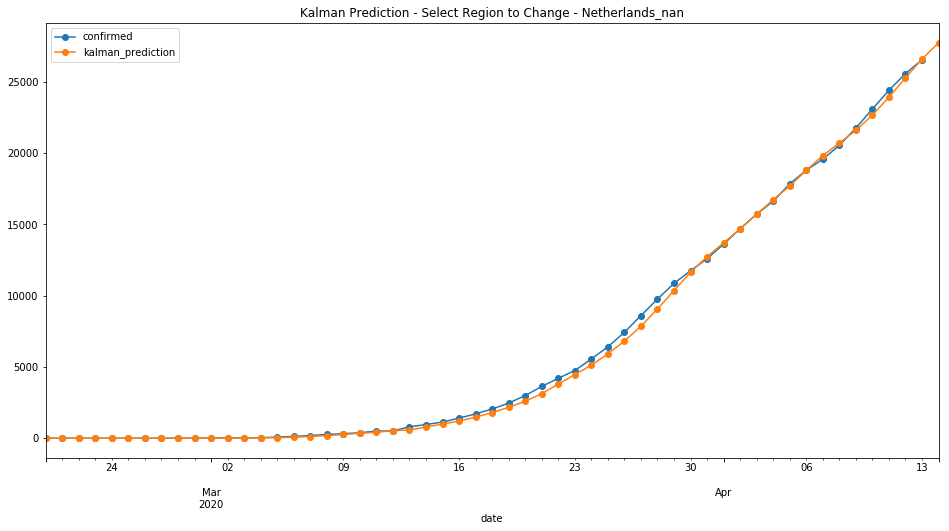

In [60]:
# Select region
region='Netherlands_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [61]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy6h5brhv
  JVM stdout: /tmp/tmpy6h5brhv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpy6h5brhv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 18 days !!!
H2O cluster name:           H2O_from_python_unknownUser_bvxxxv
H2O cluster total nodes:    1
H2O cluster free memory:    5 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [62]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

In [63]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training  progression - When growth happened 2020/03/18 to 2020/03/21
train_df=train[train['date']<'2020-04-13']
boots=train_df[train_df['date']>='2020-04-06'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-04-11']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>='2020-04-03']
test=test[test['date']<'2020-04-14']
test_v2=test[test['region'].isin(region_to_train)]

In [64]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [65]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [66]:
pred2.iloc[175:195]

0  confirmed       date                       region
175    516.0        517 2020-04-13  Australia_Western Australia
176  11555.0      11524 2020-04-03                  Austria_nan
177  11901.0      11781 2020-04-04                  Austria_nan
178  12068.0      12051 2020-04-05                  Austria_nan
179  12301.0      12297 2020-04-06                  Austria_nan
180  12503.0      12639 2020-04-07                  Austria_nan
181  12880.0      12942 2020-04-08                  Austria_nan
182  13188.0      13244 2020-04-09                  Austria_nan
183  13504.0      13555 2020-04-10                  Austria_nan
184  13808.0      13806 2020-04-11                  Austria_nan
185  14037.0      13945 2020-04-12                  Austria_nan
186  14118.0      14041 2020-04-13                  Austria_nan
187    441.0        443 2020-04-03               Azerbaijan_nan
188    486.0        521 2020-04-04               Azerbaijan_nan
189    574.0        584 2020-04-05               Azerbaijan_nan
190    641.0        641 2020-04-06               Azerbaijan_nan
191    699.0        717 2020-04-07               Azerbaijan_nan
192    777.0        822 2020-04-08               Azerbaijan_nan
193    896.0        926 2020-04-09               Azerbaijan_nan
194   1012.0        991 2020-04-10               Azerbaijan_nan

In [67]:
pred2.iloc[220:240]

0  confirmed       date          region
220   56.0         61 2020-04-03  Bangladesh_nan
221   61.0         70 2020-04-04  Bangladesh_nan
222   72.0         88 2020-04-05  Bangladesh_nan
223   93.0        123 2020-04-06  Bangladesh_nan
224  136.0        164 2020-04-07  Bangladesh_nan
225  188.0        218 2020-04-08  Bangladesh_nan
226  255.0        330 2020-04-09  Bangladesh_nan
227  399.0        424 2020-04-10  Bangladesh_nan
228  513.0        482 2020-04-11  Bangladesh_nan
229  571.0        621 2020-04-12  Bangladesh_nan
230  728.0        803 2020-04-13  Bangladesh_nan
231   49.0         51 2020-04-03    Barbados_nan
232   54.0         52 2020-04-04    Barbados_nan
233   55.0         56 2020-04-05    Barbados_nan
234   58.0         60 2020-04-06    Barbados_nan
235   62.0         63 2020-04-07    Barbados_nan
236   66.0         63 2020-04-08    Barbados_nan
237   66.0         66 2020-04-09    Barbados_nan
238   67.0         67 2020-04-10    Barbados_nan
239   67.0         68 2020-04-11    Barbados_nan

In [68]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [69]:
#Print Model
print('auc', model_v2.auc(valid=True))
print('logloss', model_v2.logloss(valid=True))
print('mse',model_v2.mse(valid=True))
print('rmse',model_v2.rmse(valid=True))

auc None
logloss None
mse None
rmse None


In [70]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF

variable  relative_importance  scaled_importance  percentage
0        7_day_change         8.861500e+16           1.000000    0.295701
1        3_day_change         7.791439e+16           0.879246    0.259994
2   kalman_prediction         4.903596e+16           0.553360    0.163629
3            last_day         4.136971e+16           0.466848    0.138047
4        1_day_change         2.122412e+16           0.239509    0.070823
5              region         1.701846e+16           0.192049    0.056789
6       infected_rate         3.622400e+15           0.040878    0.012088
7                 max         3.744618e+14           0.004226    0.001250
8                 min         2.501096e+14           0.002822    0.000835
9   3_day_change_rate         1.445890e+14           0.001632    0.000482
10  1_day_change_rate         5.919611e+13           0.000668    0.000198
11  7_day_change_rate         4.934832e+13           0.000557    0.000165

In [71]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


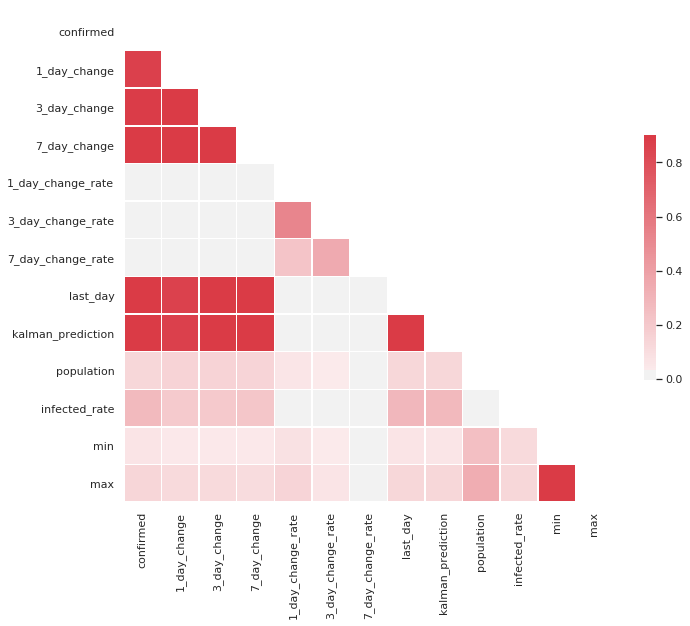

In [72]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [73]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.865580
3_day_change         0.887509
7_day_change         0.901429
1_day_change_rate    0.028035
3_day_change_rate    0.009361
7_day_change_rate   -0.000274
last_day             0.935138
kalman_prediction    0.936275
population           0.130570
infected_rate        0.269115
min                  0.065493
max                  0.135533
Name: confirmed, dtype: float64


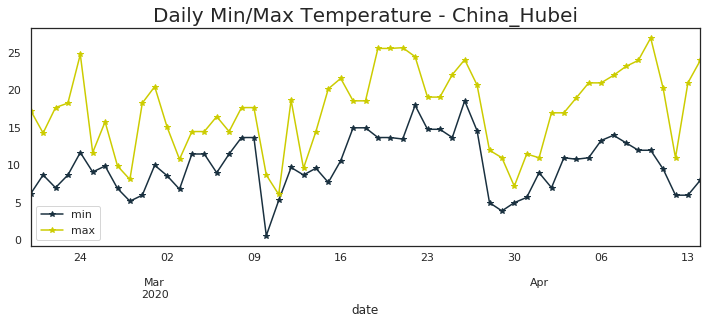

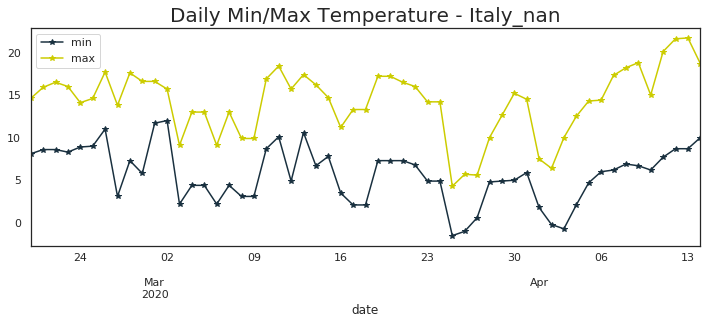

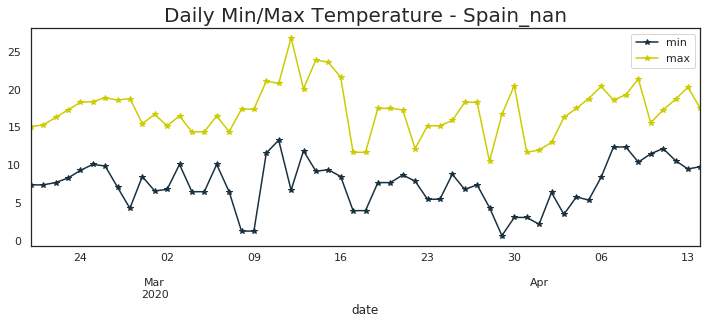

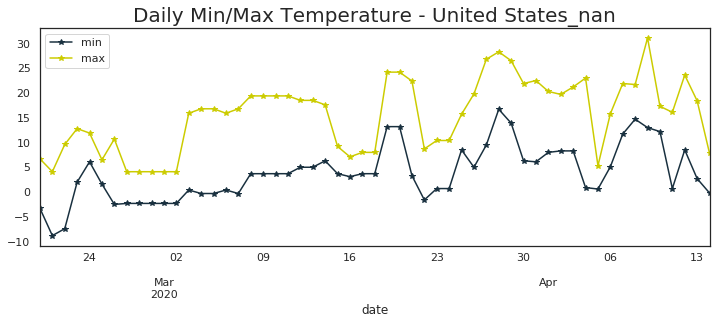

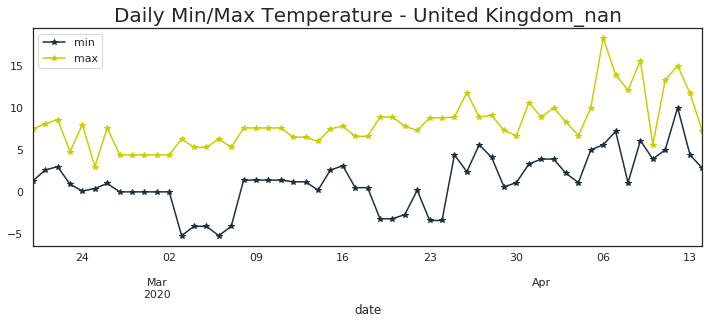

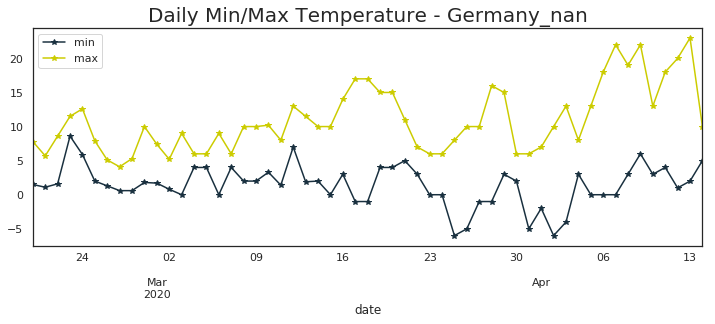

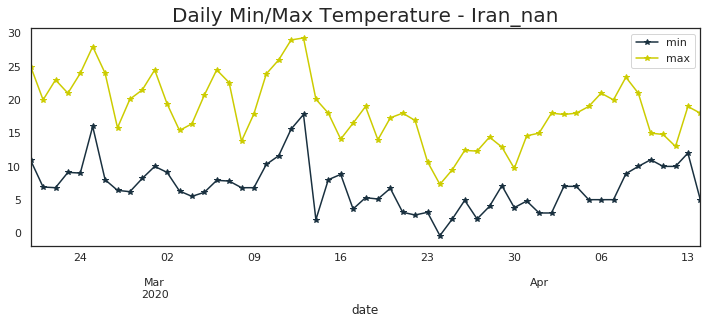

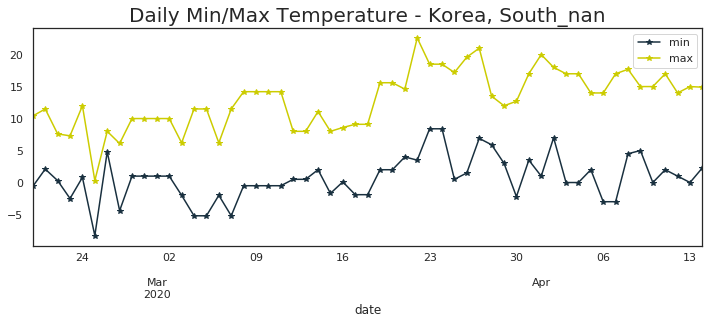

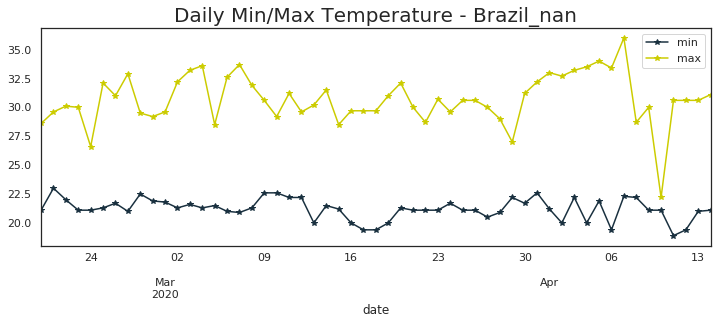

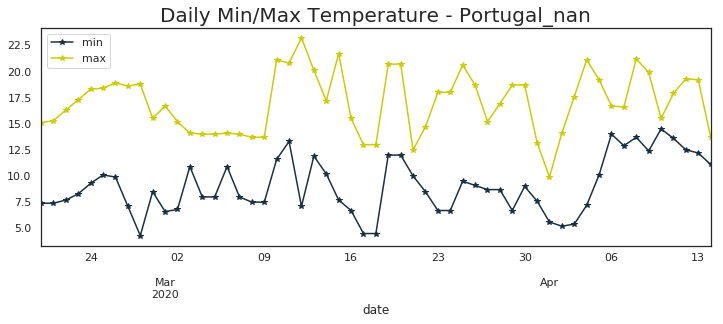

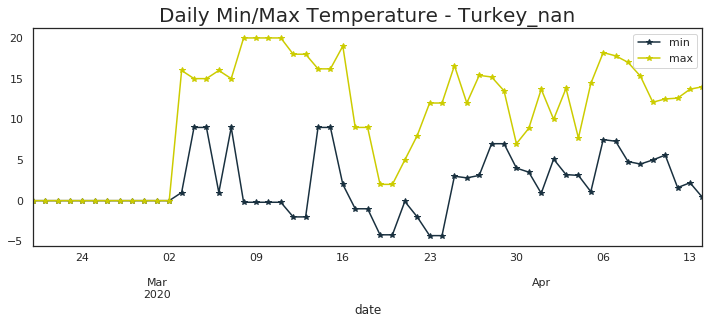

In [74]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['China_Hubei','Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan','Korea, South_nan','Brazil_nan','Portugal_nan','Turkey_nan']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [75]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           16.7  31.1
Spain_nan                   13.3  26.8
Italy_nan                   12.0  21.7
France_nan                  11.0  23.0
Germany_nan                  8.6  23.0
United Kingdom_nan          10.0  18.3
Iran_nan                    17.8  29.3
China_Hubei                 18.6  27.0
Turkey_nan                   9.0  20.0
Belgium_nan                 11.5  26.1
Netherlands_nan             12.8  26.1
Switzerland_nan              9.9  19.0
Brazil_nan                  23.0  36.0
Russia_nan                   1.3  20.0
Portugal_nan                14.5  23.2
Austria_nan                  2.6  11.7
Canada_Quebec                0.0   0.0
Israel_nan                  12.9  24.7
Sweden_nan                   2.7  12.8
Ireland_nan                  0.0   0.0
Korea, South_nan             8.4  22.6
India_nan                   25.0  40.5
Peru_nan                    

### Kalman X Days Ahead Prediction

In [76]:
%%R

#install.packages('reshape')

NULL


In [77]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:58) { # Set i days prediction    ### 60 days forward prediction with Kalman Filter
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [78]:
all_new=%R all_new

In [79]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

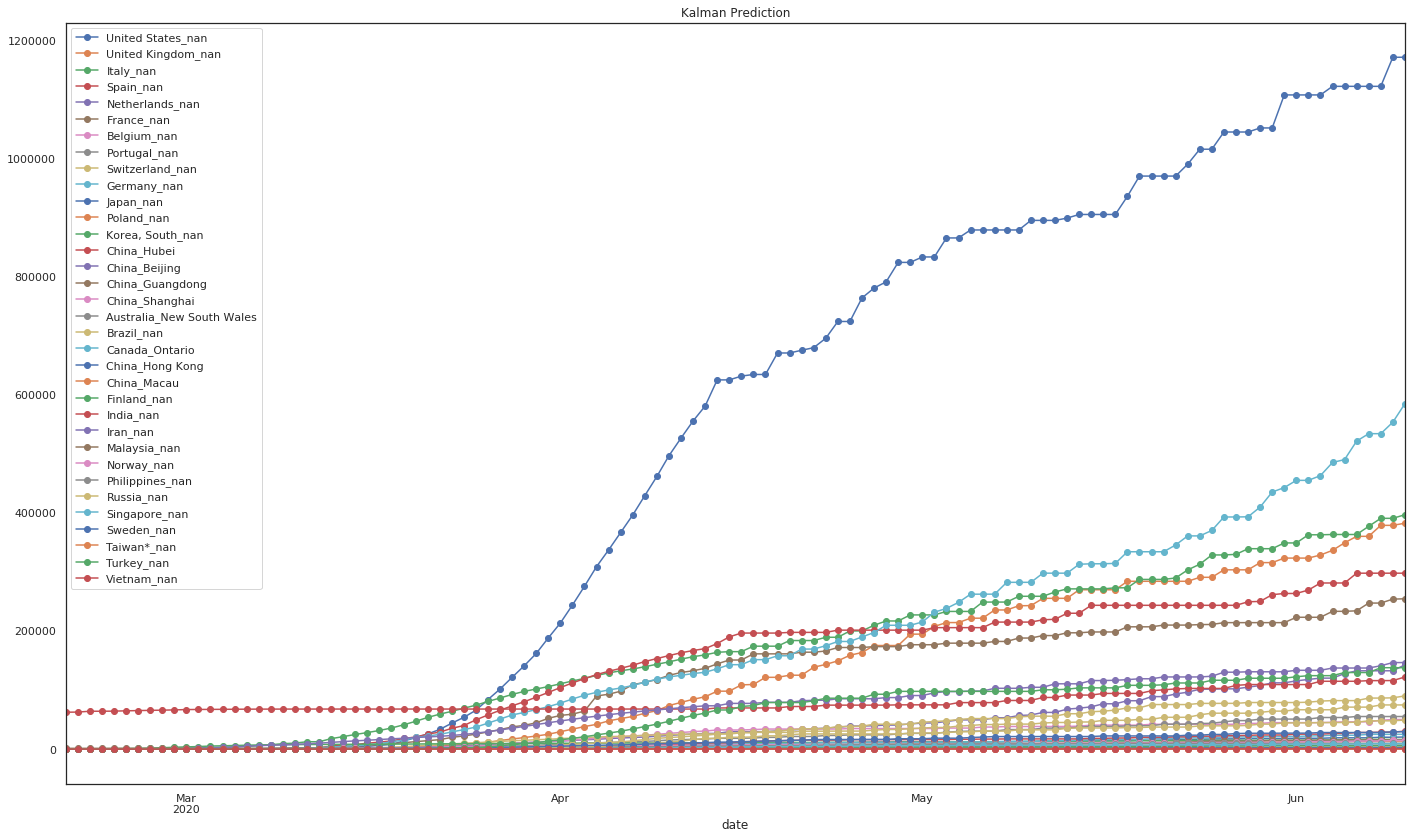

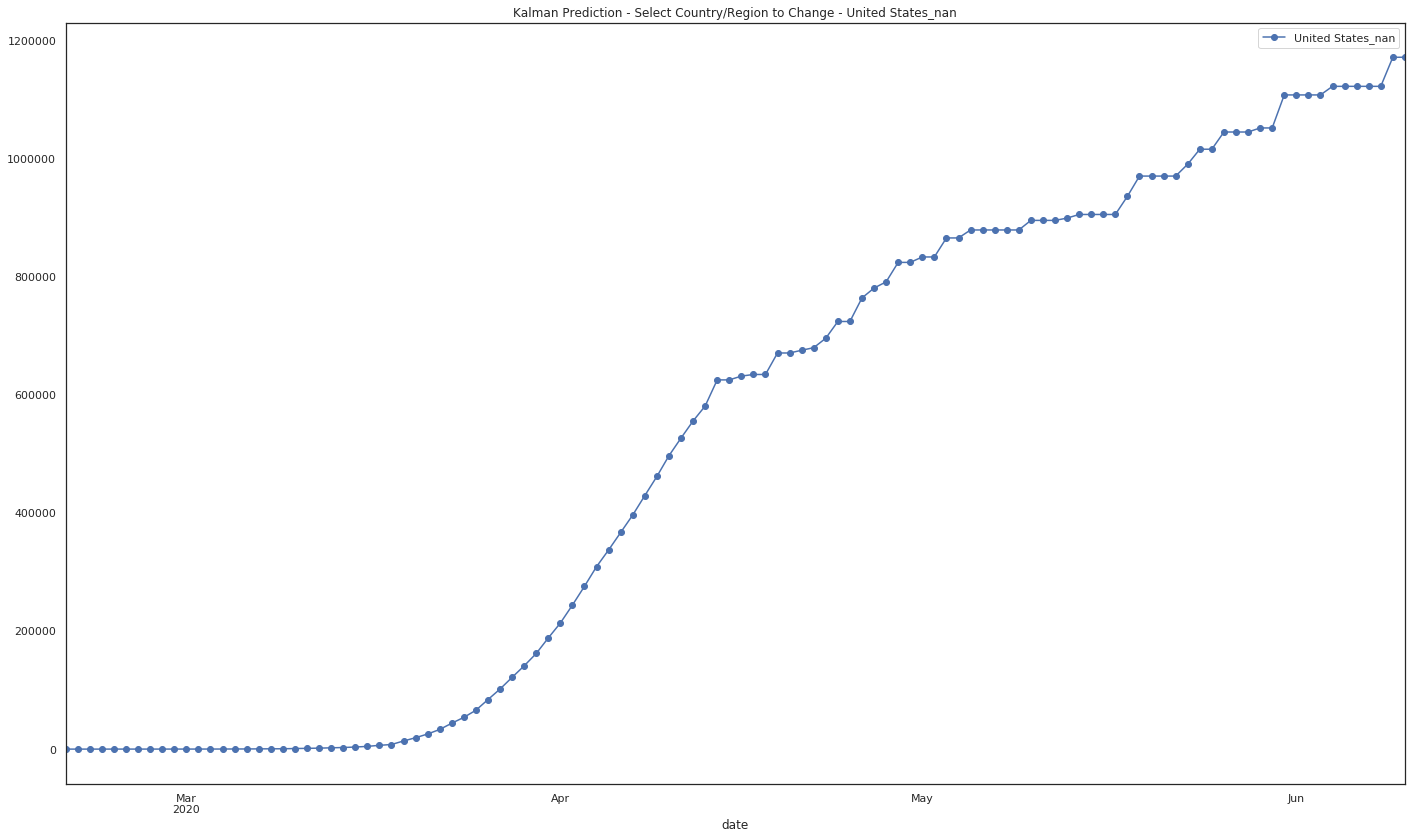

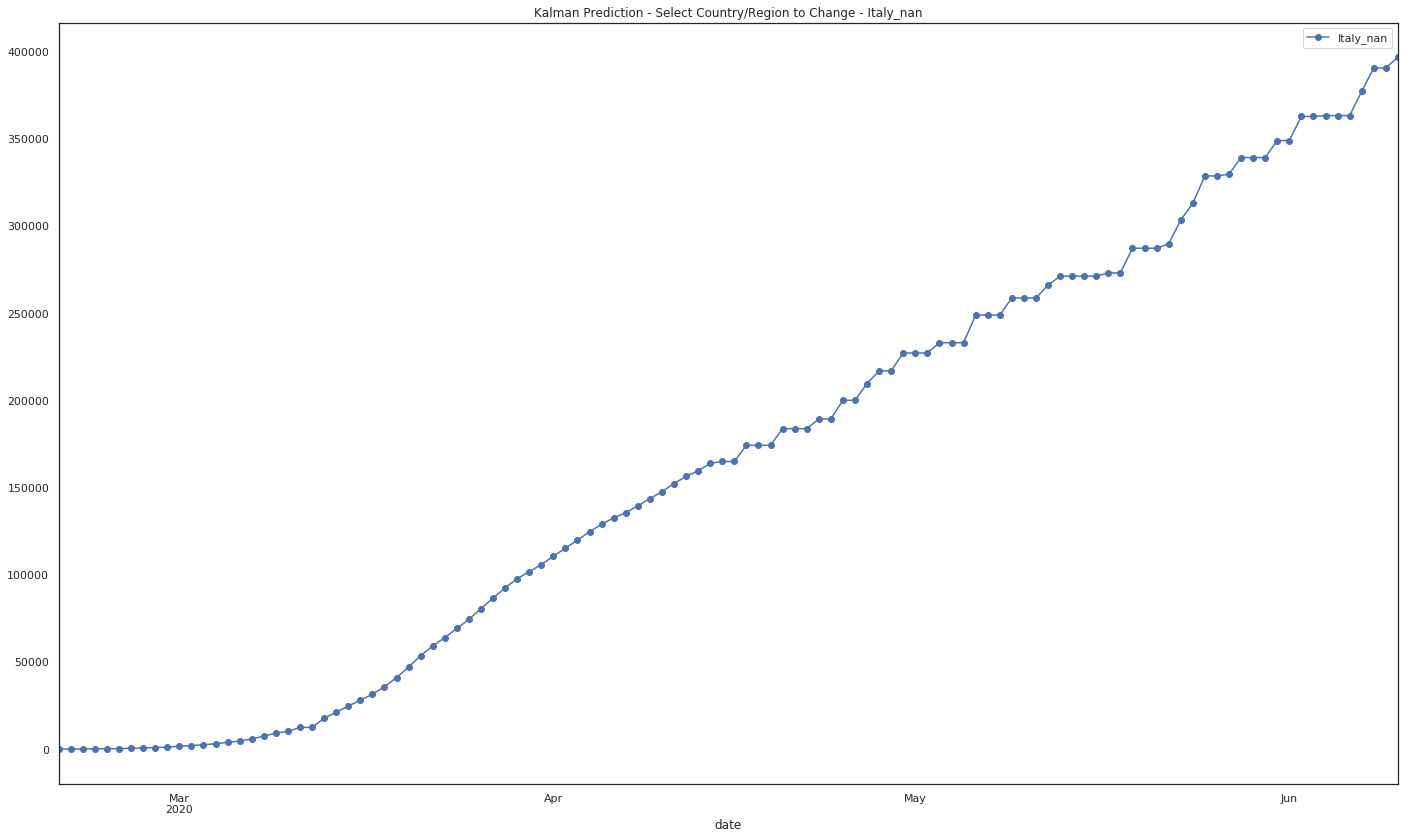

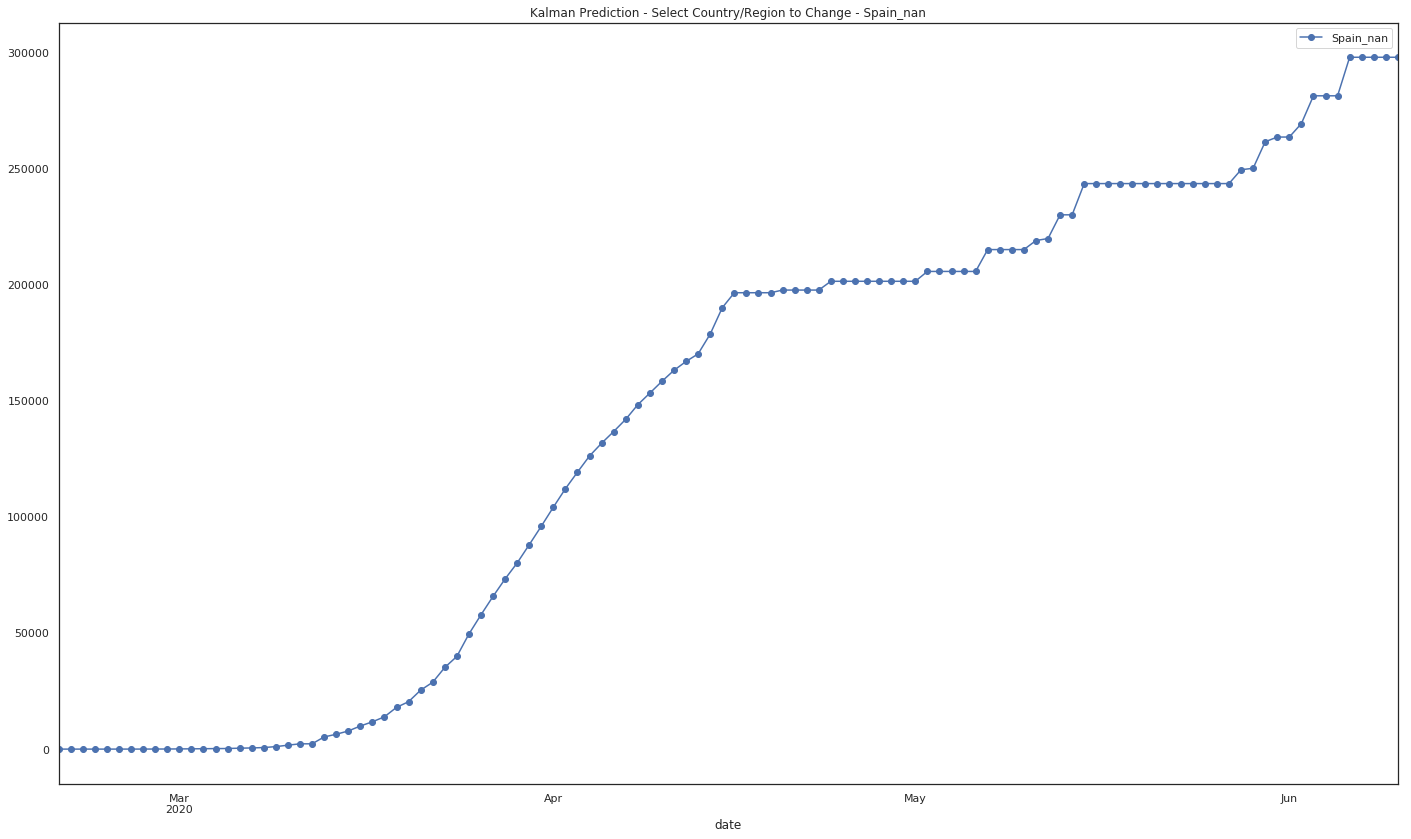

In [80]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


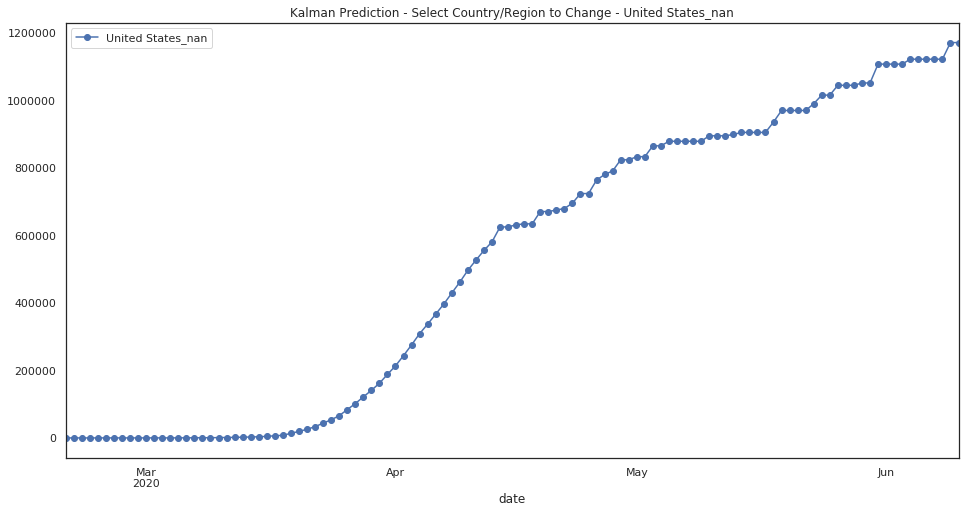

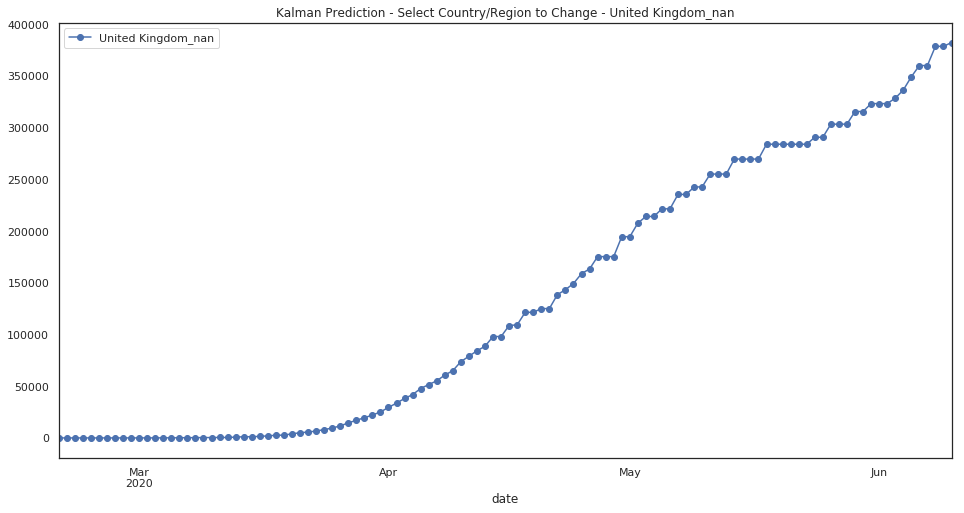

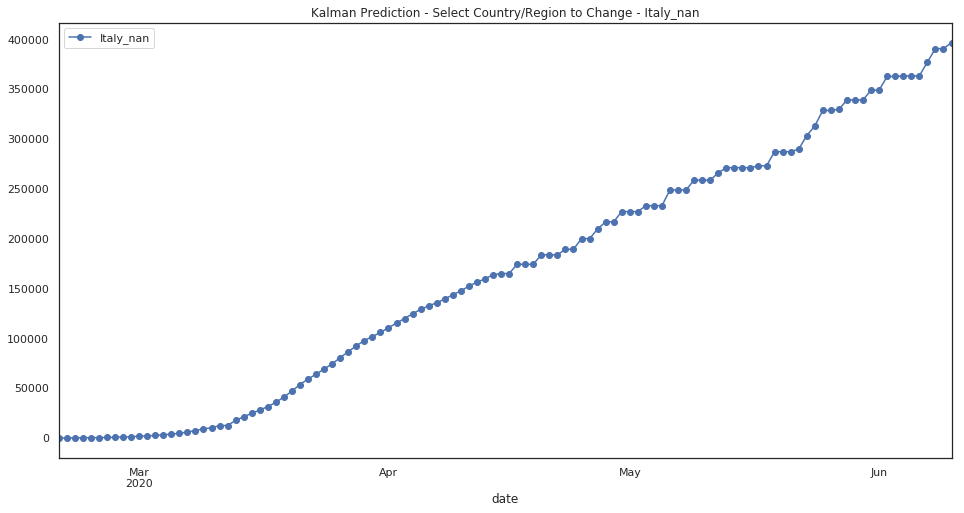

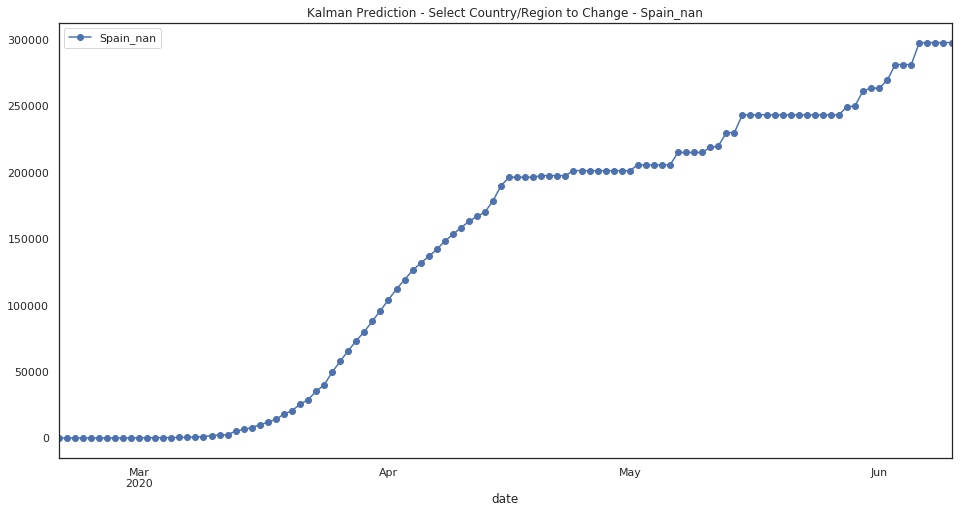

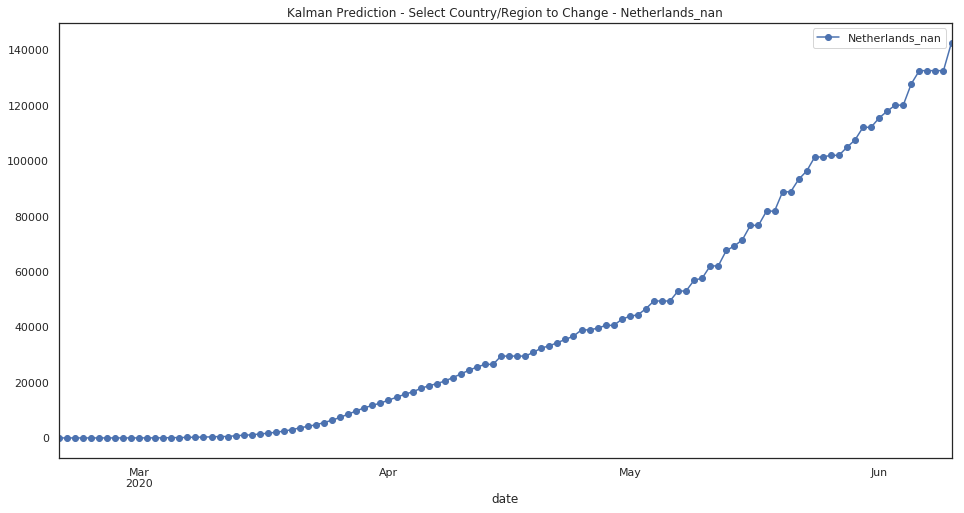

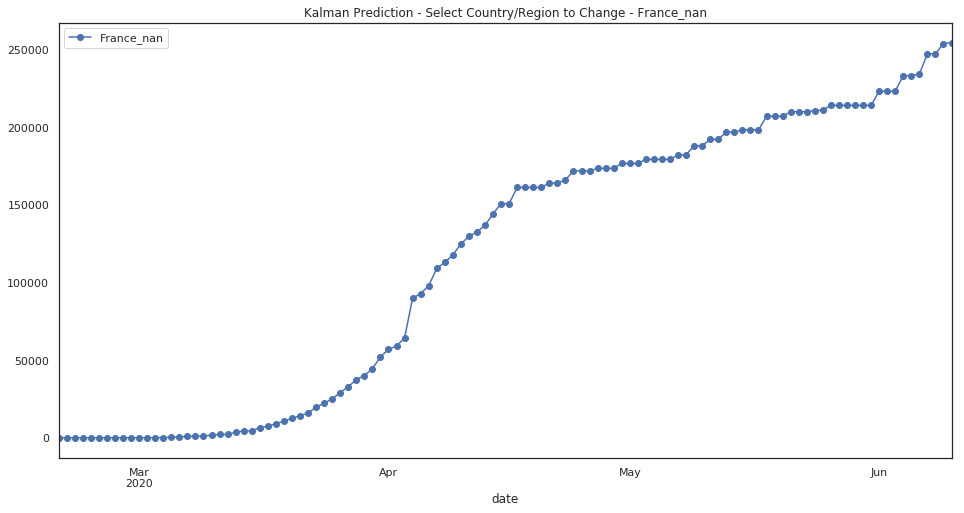

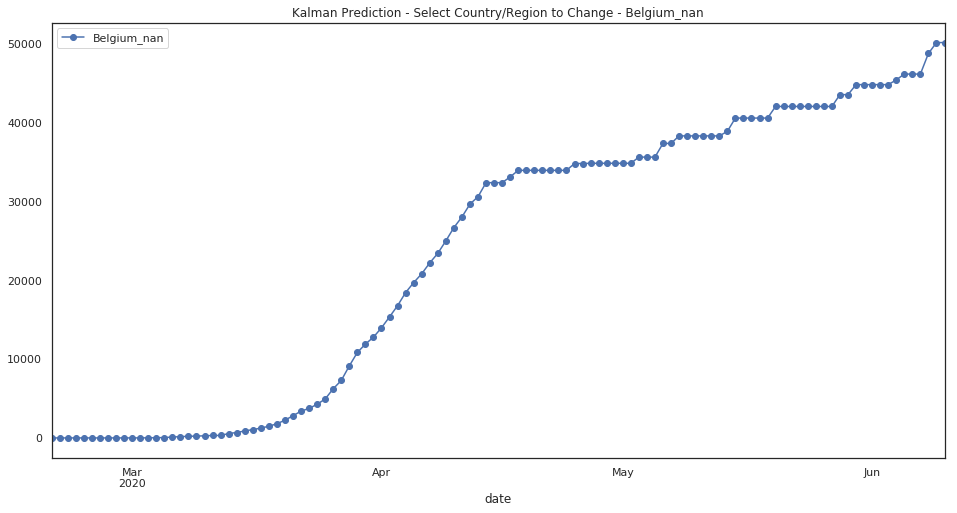

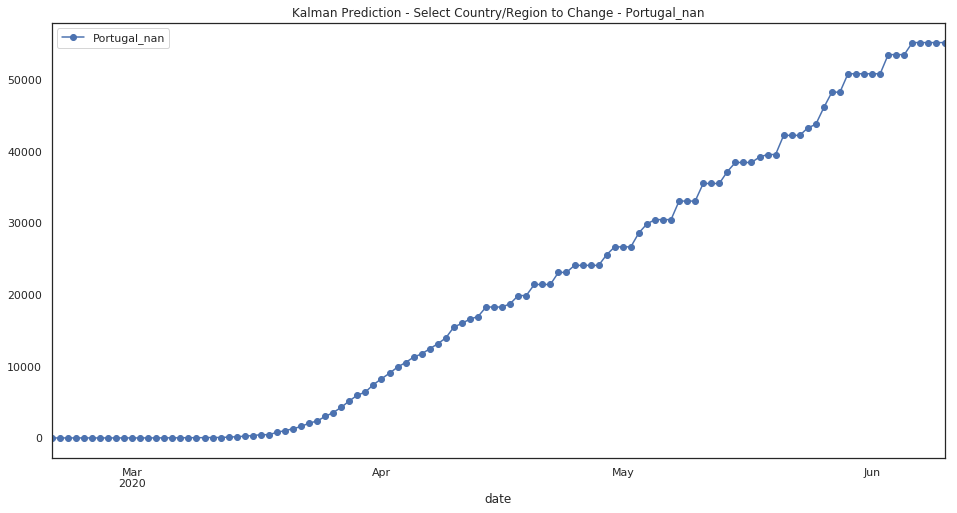

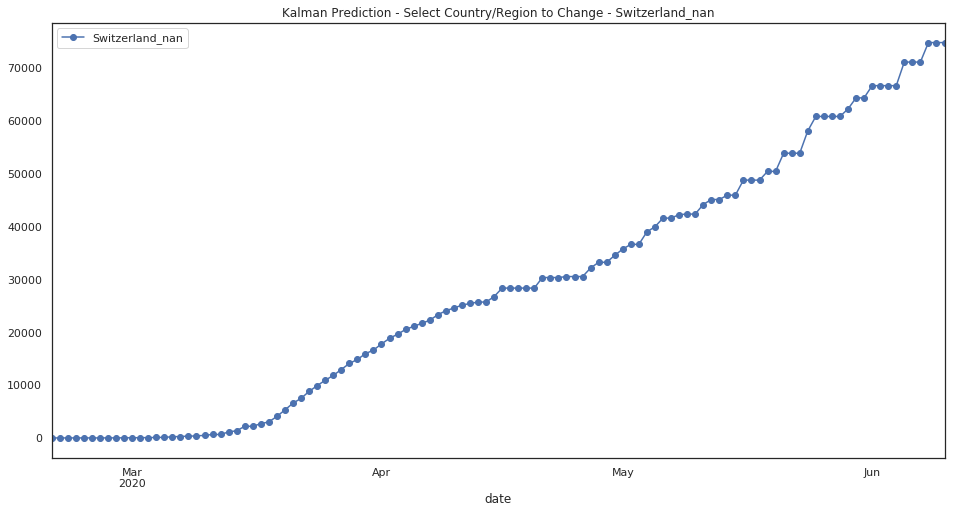

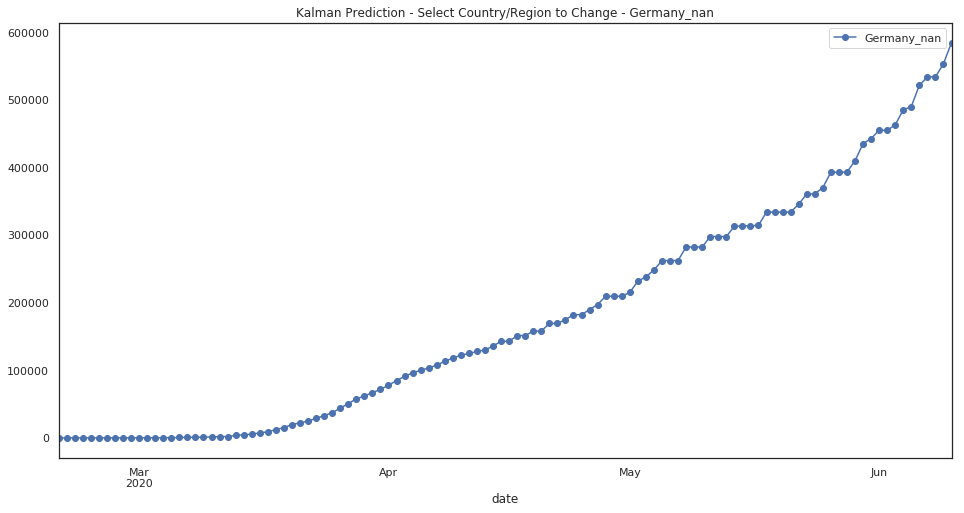

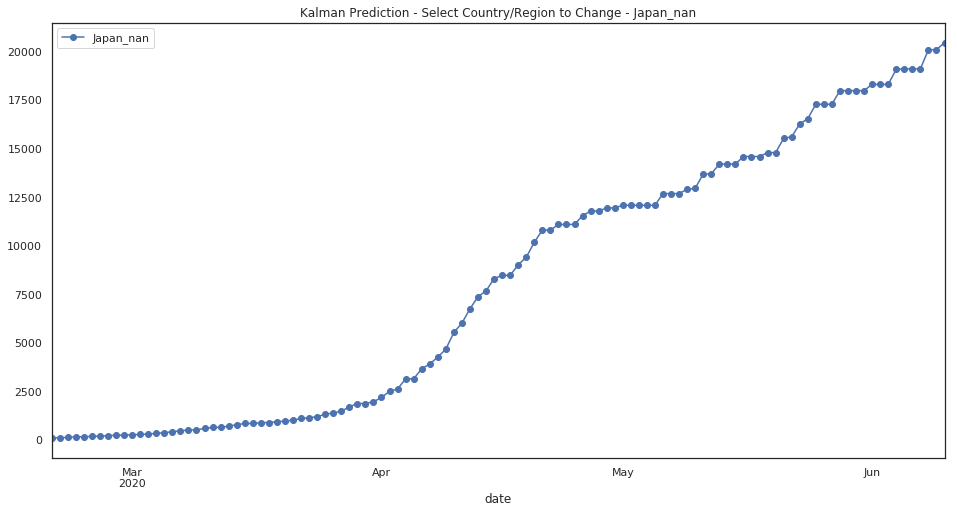

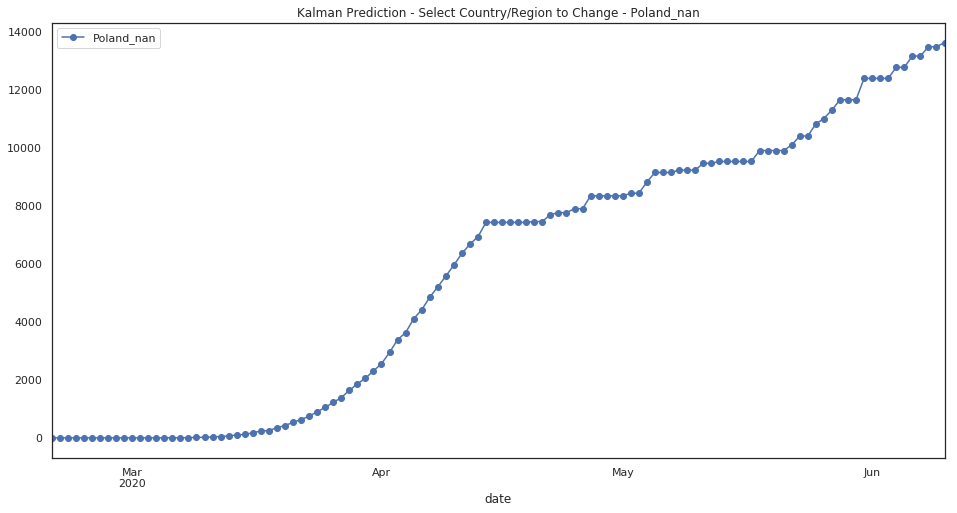

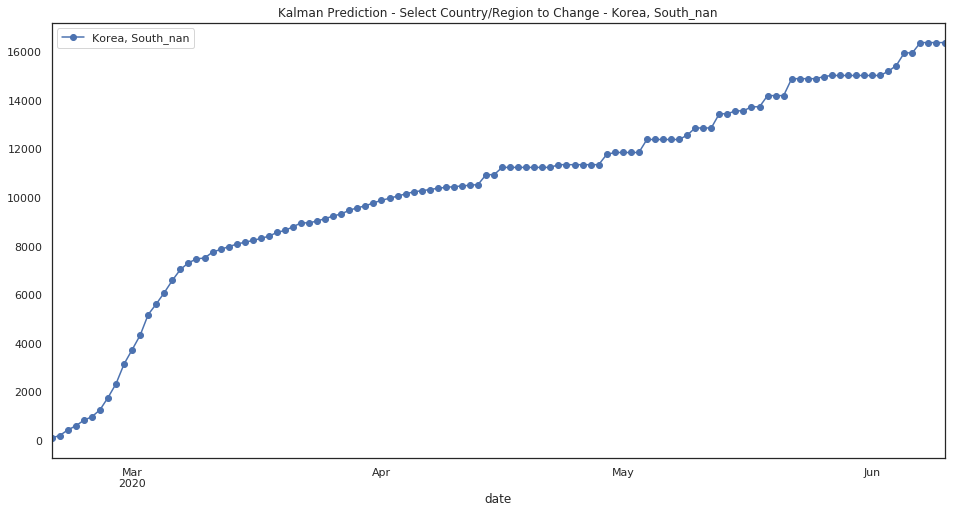

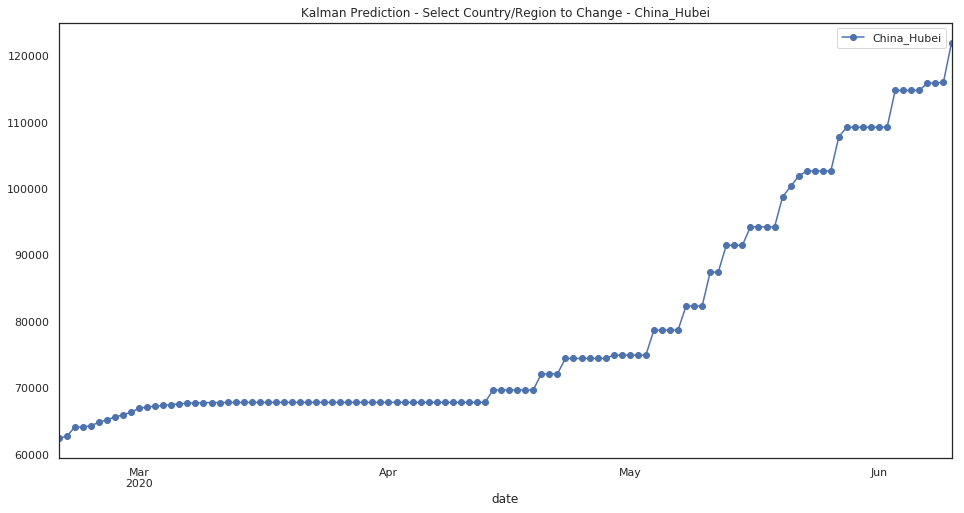

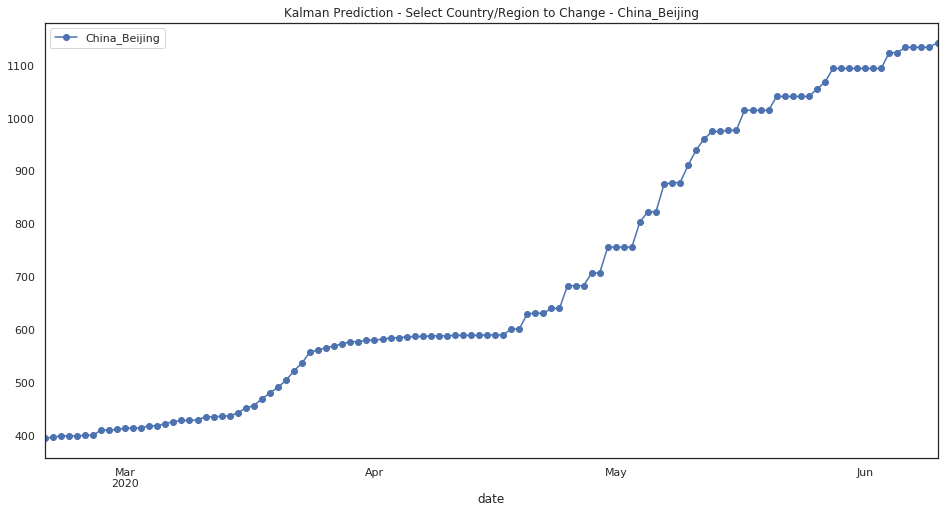

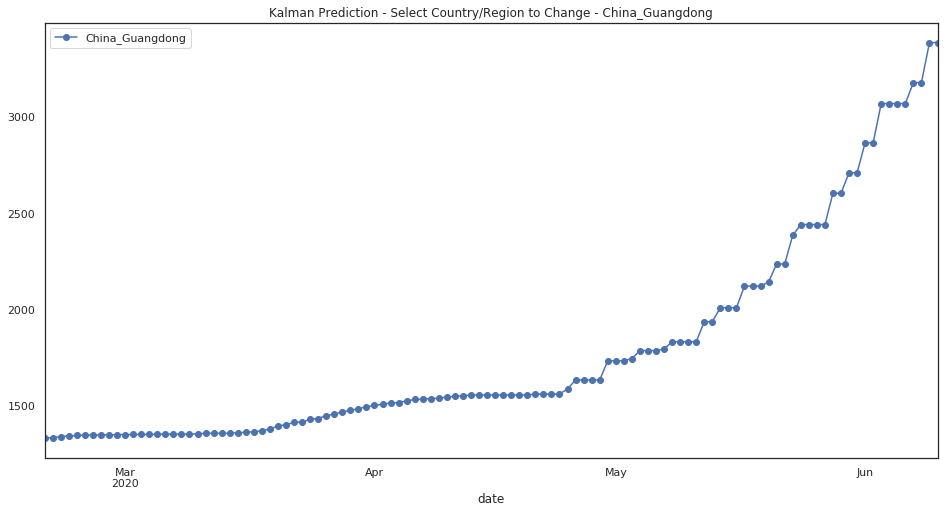

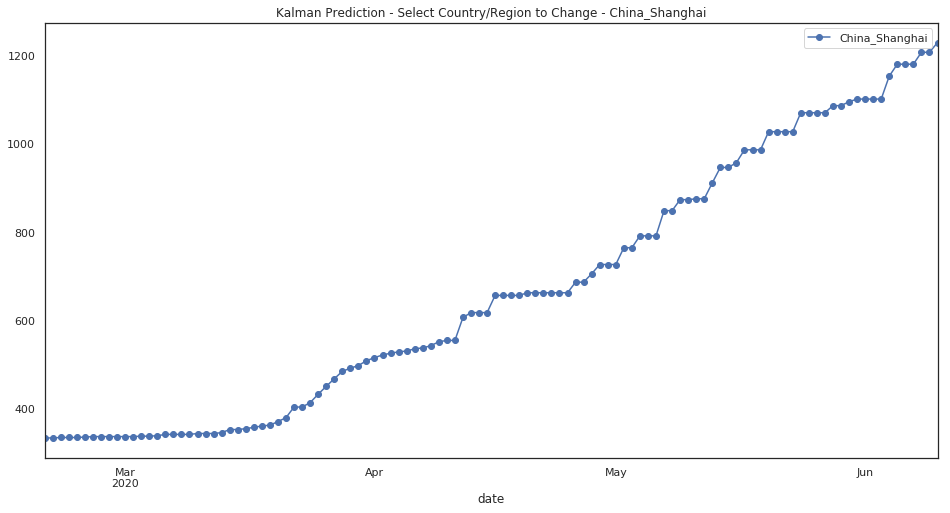

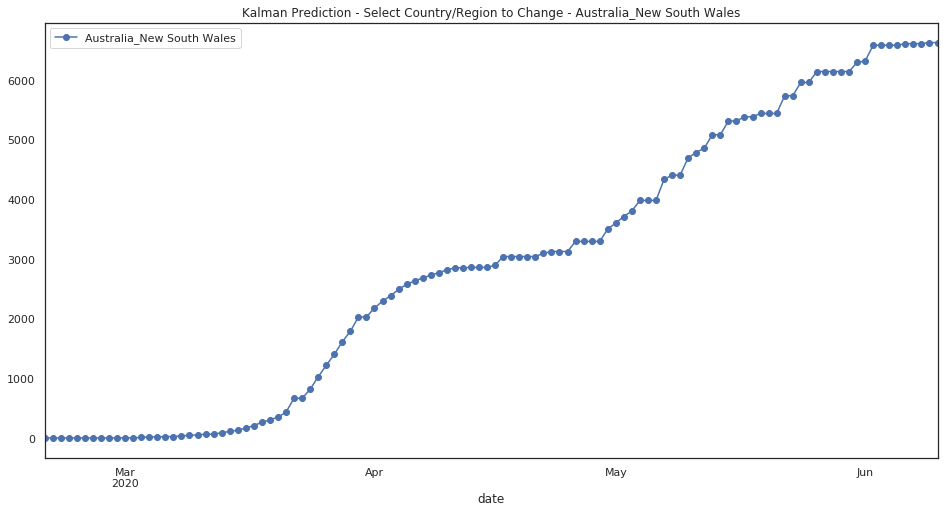

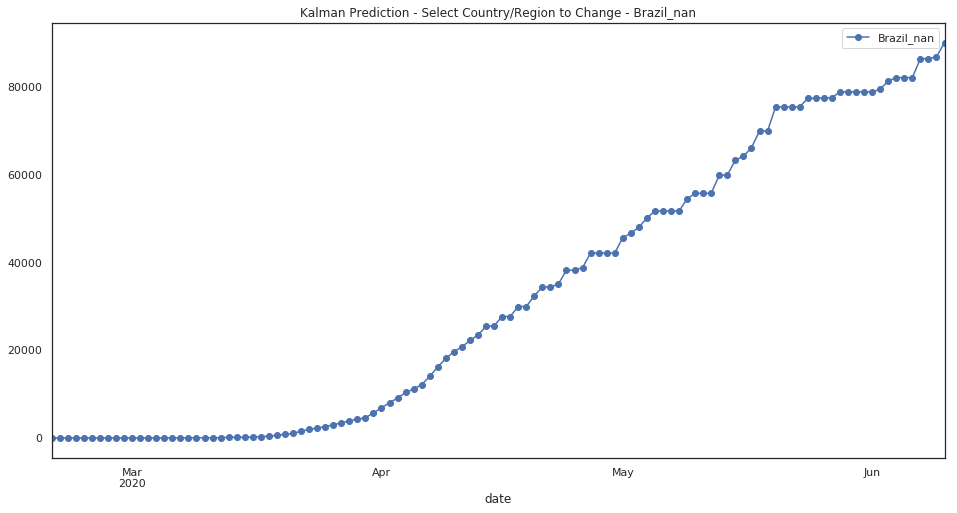

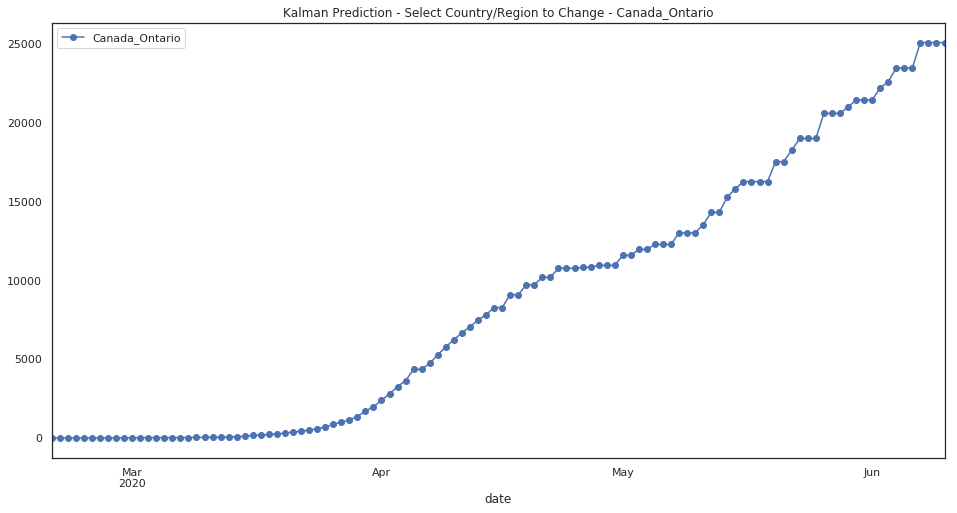

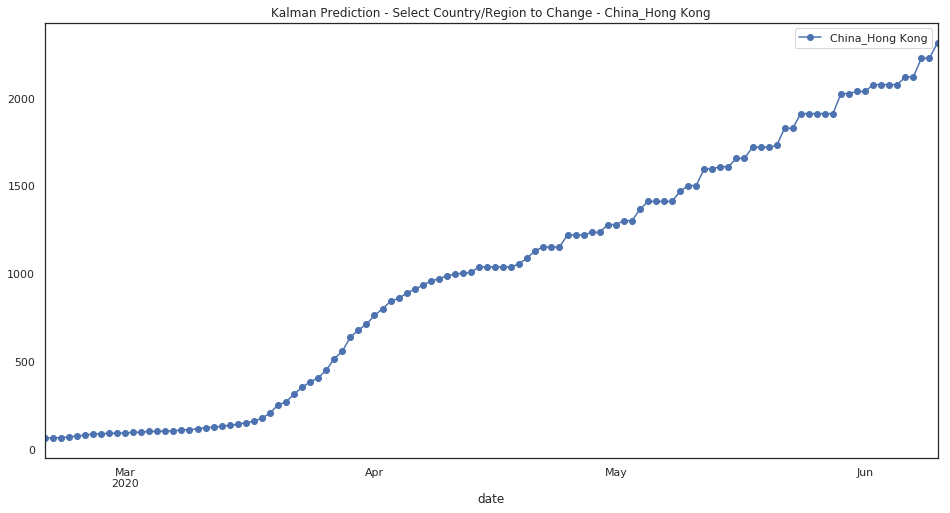

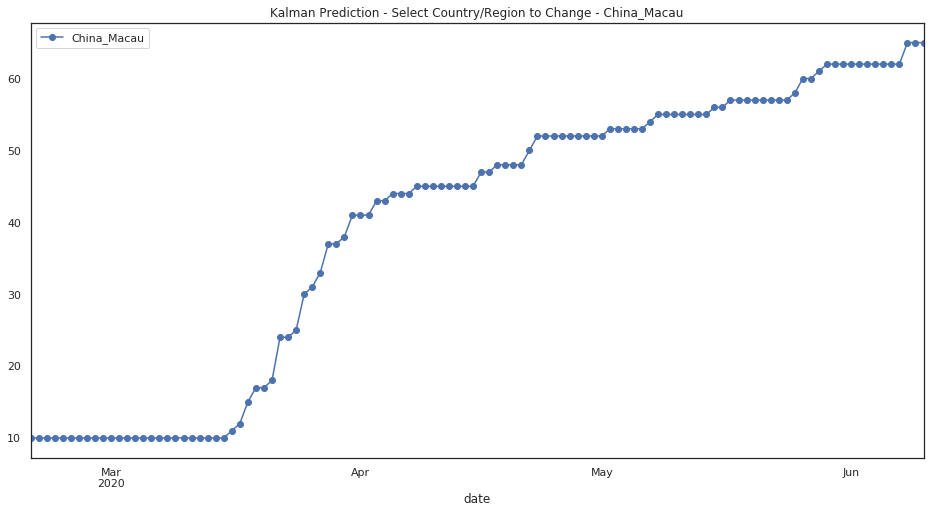

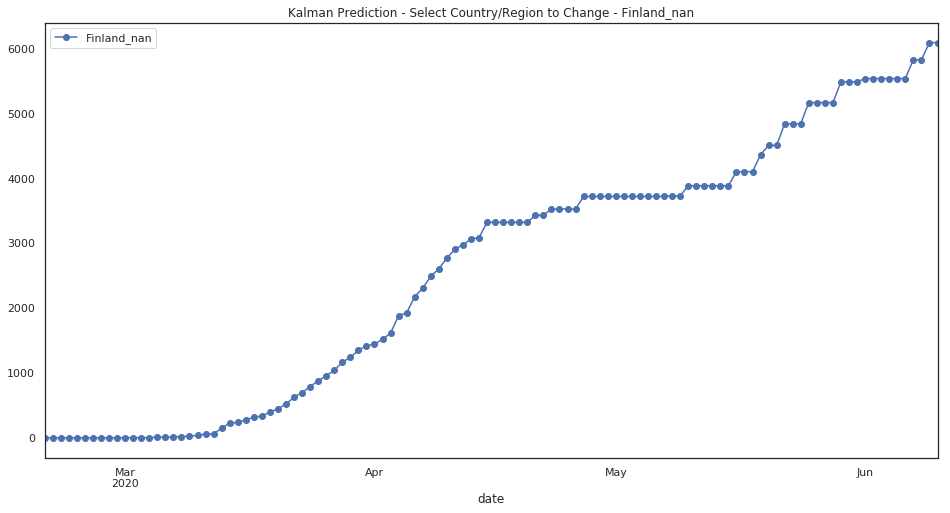

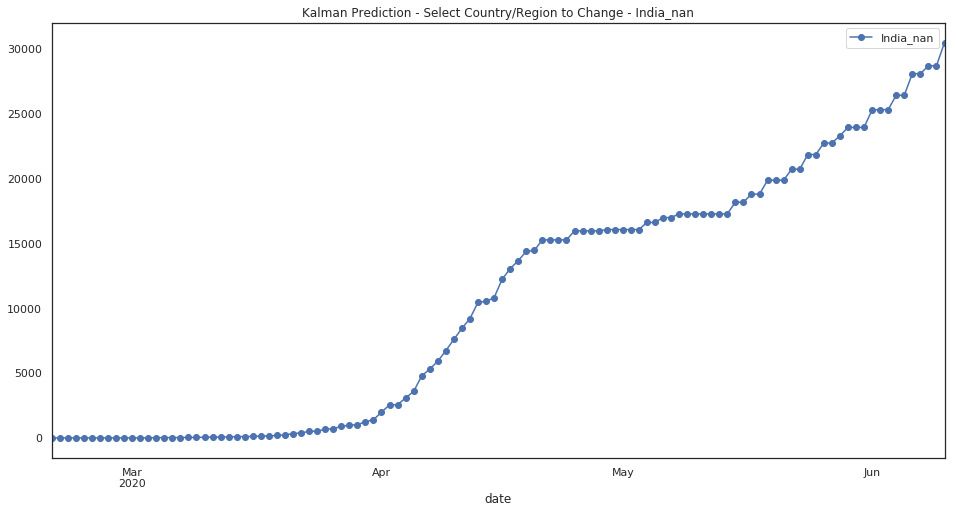

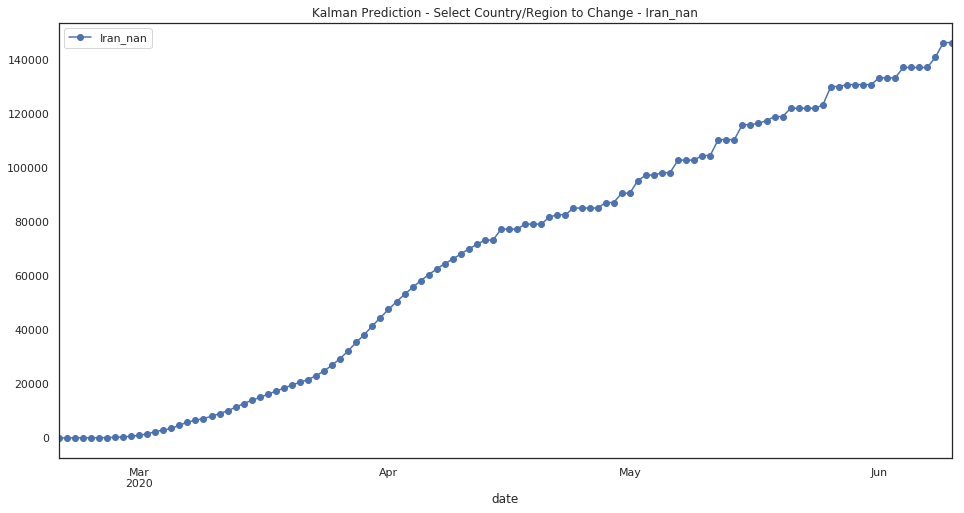

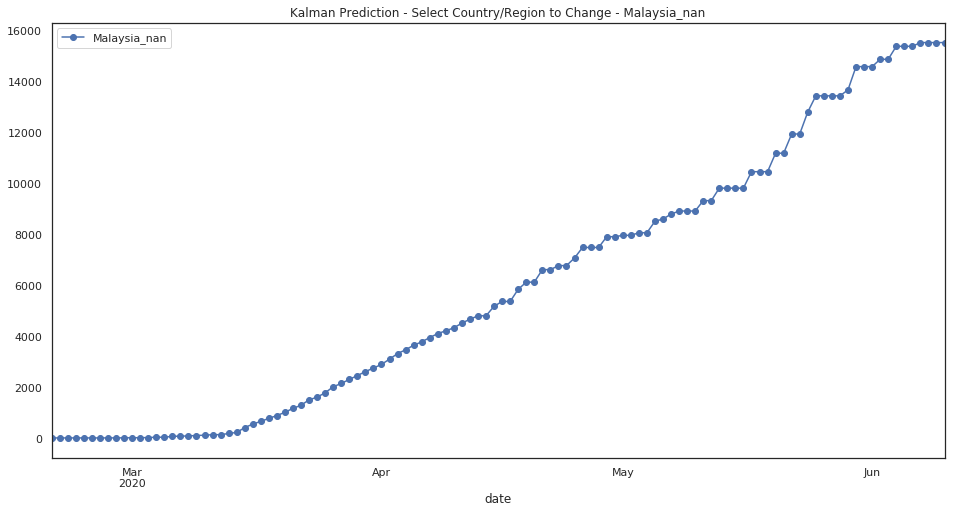

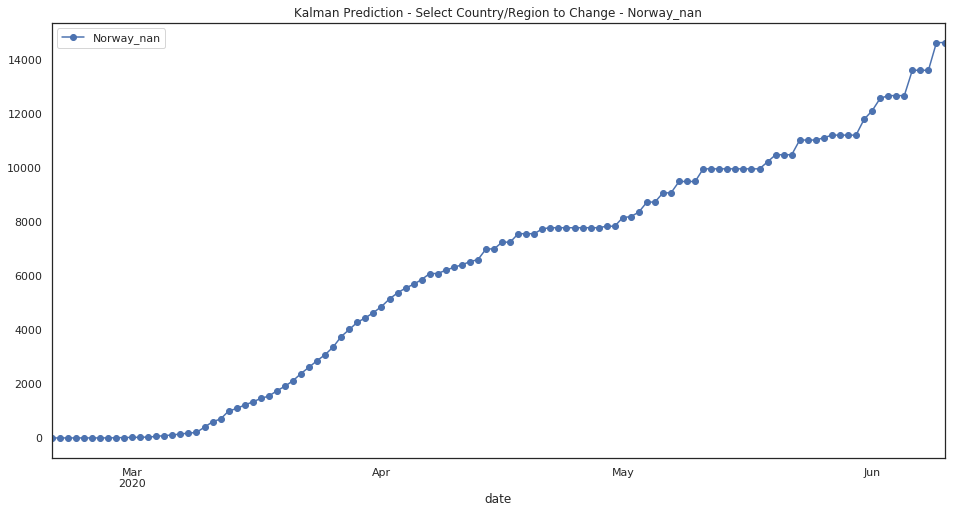

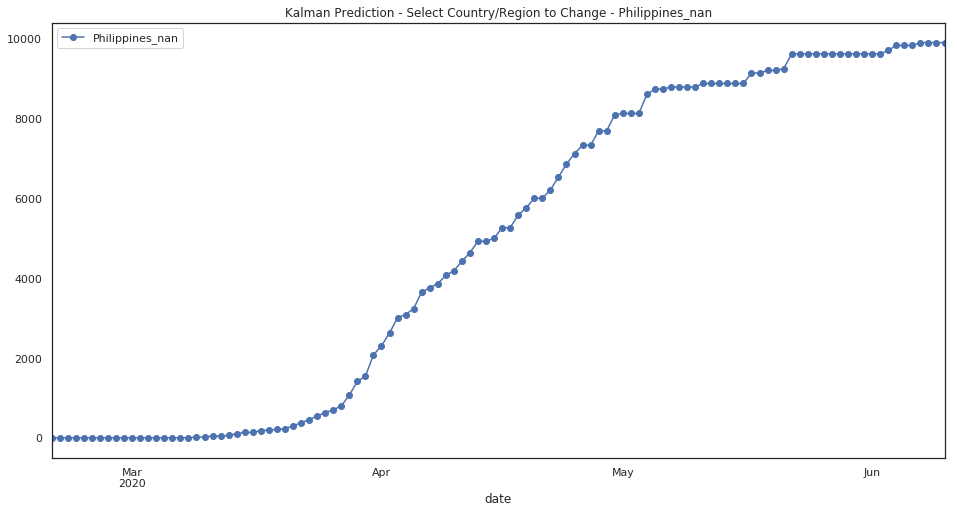

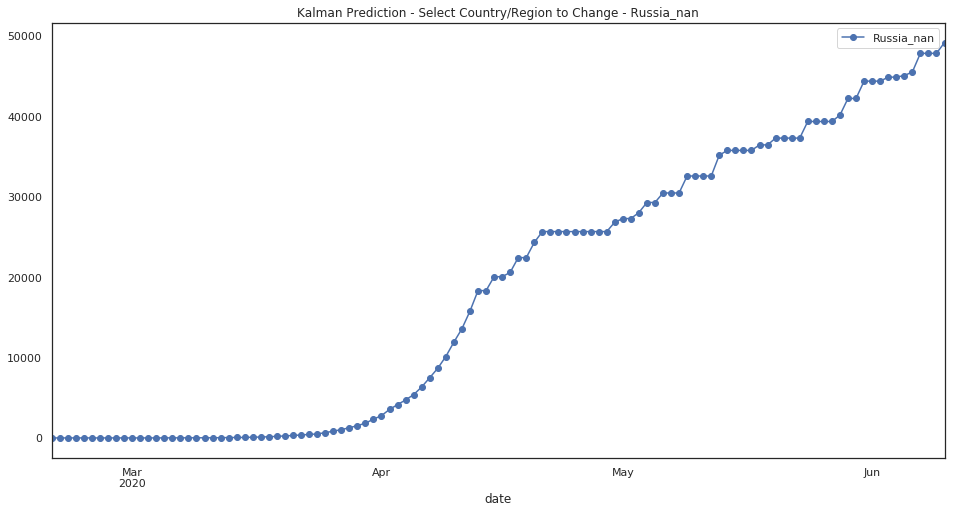

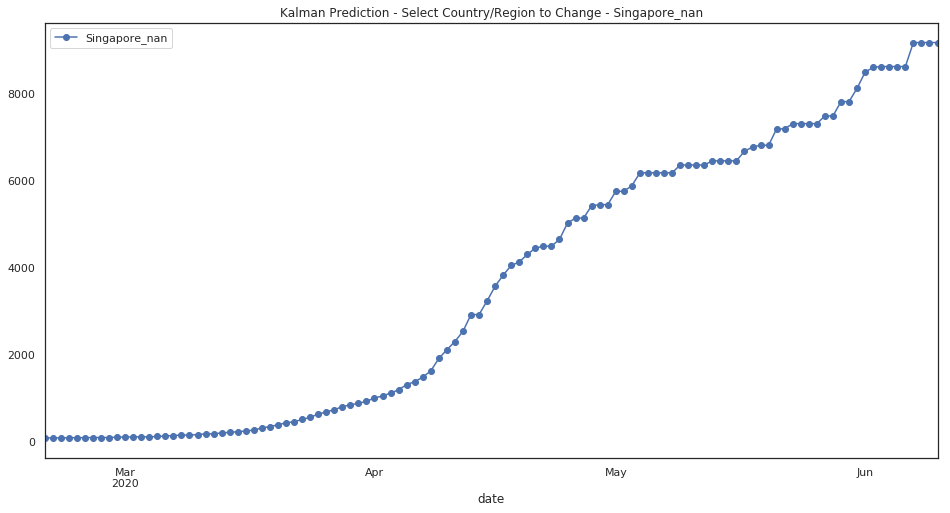

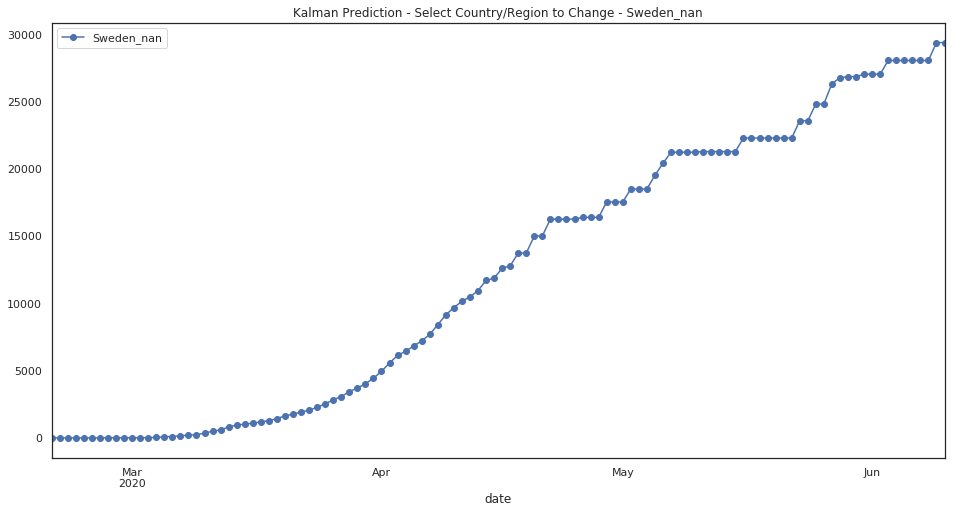

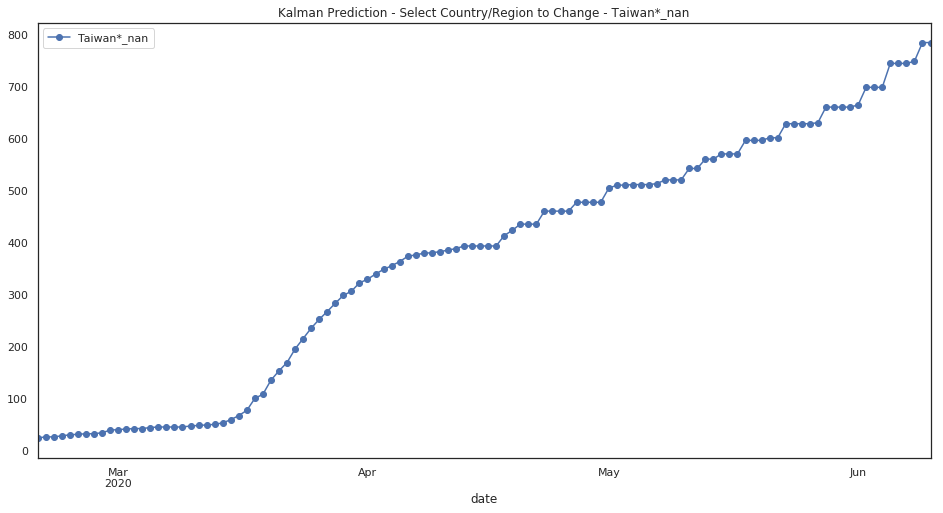

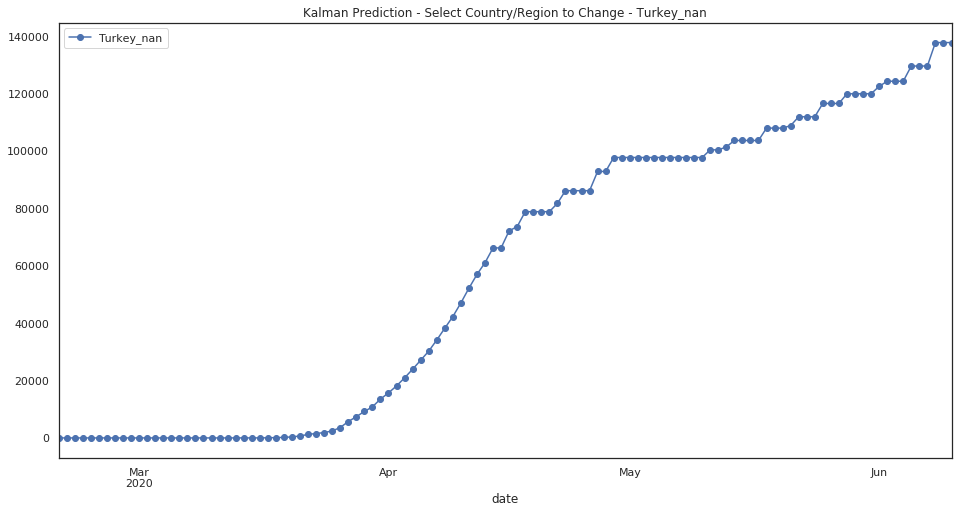

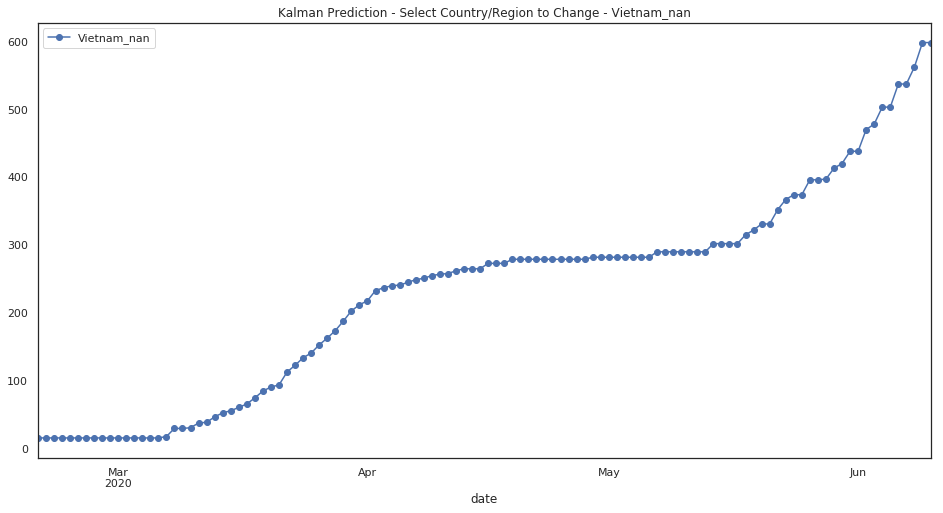

In [81]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [82]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-06-10 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             1170917.0       1170917.0
Germany_nan                                    584566.0        584566.0
Italy_nan                                      396661.0        396661.0
United Kingdom_nan                             382314.0        382314.0
Spain_nan                                      297736.0        297736.0
France_nan                                     254419.0        254419.0
Iran_nan                                       146452.0        146452.0
Netherlands_nan                                142696.0        142696.0
Turkey_nan                                     137761.0        137761.0
China_Hubei                                    121991.0        121991.0
Brazil_nan                                      90030.0         90030.0
Switzerland_nan                                 74741.0         74741.0
Portugal_nan                                    55168.0         55168.0
Belgium_nan                                     50132.0         50132.0
Russia_nan                                      49192.0         49192.0
Canada_Quebec                                   48942.0         48942.0
Peru_nan                                        38221.0         38221.0
India_nan                                       30473.0         30473.0
Sweden_nan                                      29374.0         29374.0
Canada_Ontario                                  25052.0         25052.0
Israel_nan                                      24779.0         24779.0
Austria_nan                                     22440.0         22440.0
Ireland_nan                                     21888.0         21888.0
Ecuador_nan                                     21227.0         21227.0
Japan_nan                                       20463.0         20463.0
Korea, South_nan                                16385.0         16385.0
Malaysia_nan                                    15544.0         15544.0
Romania_nan                                     15498.0         15498.0
Chile_nan                                       15295.0         15295.0
Saudi Arabia_nan                                15128.0         15128.0
...                                                 ...             ...
Saint Lucia_nan                                    24.0            24.0
Netherlands_Curacao                                22.0            22.0
United Kingdom_Montserrat                          20.0            20.0
Sierra Leone_nan                                   19.0            19.0
Cabo Verde_nan                                     19.0            19.0
Seychelles_nan                                     18.0            18.0
Saint Vincent and the Grenadines_nan               17.0            17.0
Saint Kitts and Nevis_nan                          14.0            14.0
Western Sahara_nan                                 11.0            11.0
Denmark_Greenland                                  11.0            11.0
South Sudan_nan                                    10.0            10.0
Suriname_nan                                       10.0            10.0
MS Zaandam_nan                                      9.0             9.0
Holy See_nan                                        8.0             8.0
Mauritania_nan                                      7.0             7.0
France_Saint Barthelemy                             6.0             6.0
United Kingdom_Falkland Islands (Malvinas)          6.0             6.0
Canada_Northwest Territories                        5.0             5.0
Bhutan_nan                                          5.0             5.0
Timor-Leste_nan                                     4.0             4.0
Sao Tome and Principe_nan                           4.0             4.0
Netherlands_Bonaire, Sint Eustatius and Saba        3.0             3.0
United Kingdom_Anguilla                             3.0             3.0
United Kingdom_British Virgin Islands               3.0             3.0
Papua New Guinea_nan  

In [83]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [84]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [85]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


In [86]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [87]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [88]:
pred[47:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-07            367.0        377.0       1423.0        525.0   
2020-04-08            423.0        383.0       1468.0        545.0   
2020-04-09            444.0        400.0       1572.0        564.0   
2020-04-10            484.0        409.0       1666.0        583.0   
2020-04-11            521.0        416.0       1761.0        601.0   
2020-04-12            555.0        433.0       1825.0        601.0   
2020-04-13            607.0        446.0       1914.0        638.0   
2020-04-14            665.0        467.0       1983.0        646.0   
2020-04-15            722.0        467.0       1983.0        646.0   
2020-04-16            762.0        467.0       2106.0        664.0   
2020-04-17            787.0        502.0       2106.0        685.0   
2020-04-18            823.0        524.0       2202.0        685.0   
2020-04-19            823.0        524.0       2298.0        685.0   
2020-04-20            876.0        535.0       2298.0        700.0   
2020-04-21            909.0        535.0       2298.0        712.0   
2020-04-22            949.0        535.0       2298.0        751.0   
2020-04-23            949.0        542.0       2298.0        781.0   
2020-04-24           1039.0        581.0       2376.0        783.0   
2020-04-25           1092.0        581.0       2376.0        783.0   
2020-04-26           1092.0        581.0       2512.0        839.0   
2020-04-27           1092.0        581.0       2512.0        840.0   
2020-04-28           1153.0        595.0       2601.0        854.0   
2020-04-29           1233.0        595.0       2601.0        854.0   
2020-04-30           1233.0        595.0       2601.0        854.0   
2020-05-01           1233.0        595.0       2601.0        857.0   
2020-05-02           1257.0        613.0       2601.0        857.0   
2020-05-03           1278.0        619.0       2601.0        857.0   
2020-05-04           1278.0        619.0       2601.0        868.0   
2020-05-05           1278.0        619.0       2601.0        868.0   
2020-05-06           1348.0        653.0       2601.0        907.0   
...                     ...          ...          ...          ...   
2020-05-13           1469.0        715.0       2791.0        990.0   
2020-05-14           1469.0        715.0       2791.0       1010.0   
2020-05-15           1553.0        751.0       2791.0       1010.0   
2020-05-16           1598.0        756.0       2791.0       1068.0   
2020-05-17           1598.0        772.0       2928.0       1068.0   
2020-05-18           1657.0        800.0       2928.0       1068.0   
2020-05-19           1657.0        806.0       2928.0       1074.0   
2020-05-20           1783.0        807.0       2928.0       1074.0   
2020-05-21           1811.0        807.0       3002.0       1074.0   
2020-05-22           1888.0        807.0       3074.0       1137.0   
2020-05-23           1890.0        807.0       3074.0       1137.0   
2020-05-24           1951.0        807.0       3074.0       1192.0   
2020-05-25           1951.0        807.0       3074.0       1239.0   
2020-05-26           2019.0        846.0       3074.0       1248.0   
2020-05-27           2048.0        846.0       3074.0       1248.0   
2020-05-28           2048.0        846.0       3151.0       1248.0   
2020-05-29           2206.0        846.0       3203.0       1310.0   
2020-05-30           2298.0        846.0       3247.0       1313.0   
2020-05-31           2298.0        846.0       3309.0       1347.0   
2020-06-01           2298.0        846.0       3309.0       1397.0   
2020-06-02           2471.0        846.0       3367.0       1451.0   
2020-06-03           2603.0        862.0       3367.0       1451.0   
2020-06-04           2669.0        862.0       3523.0       1451.0   
2020-06-05           2669.0        862.0       3646.0       1451.0   
2020-06-06

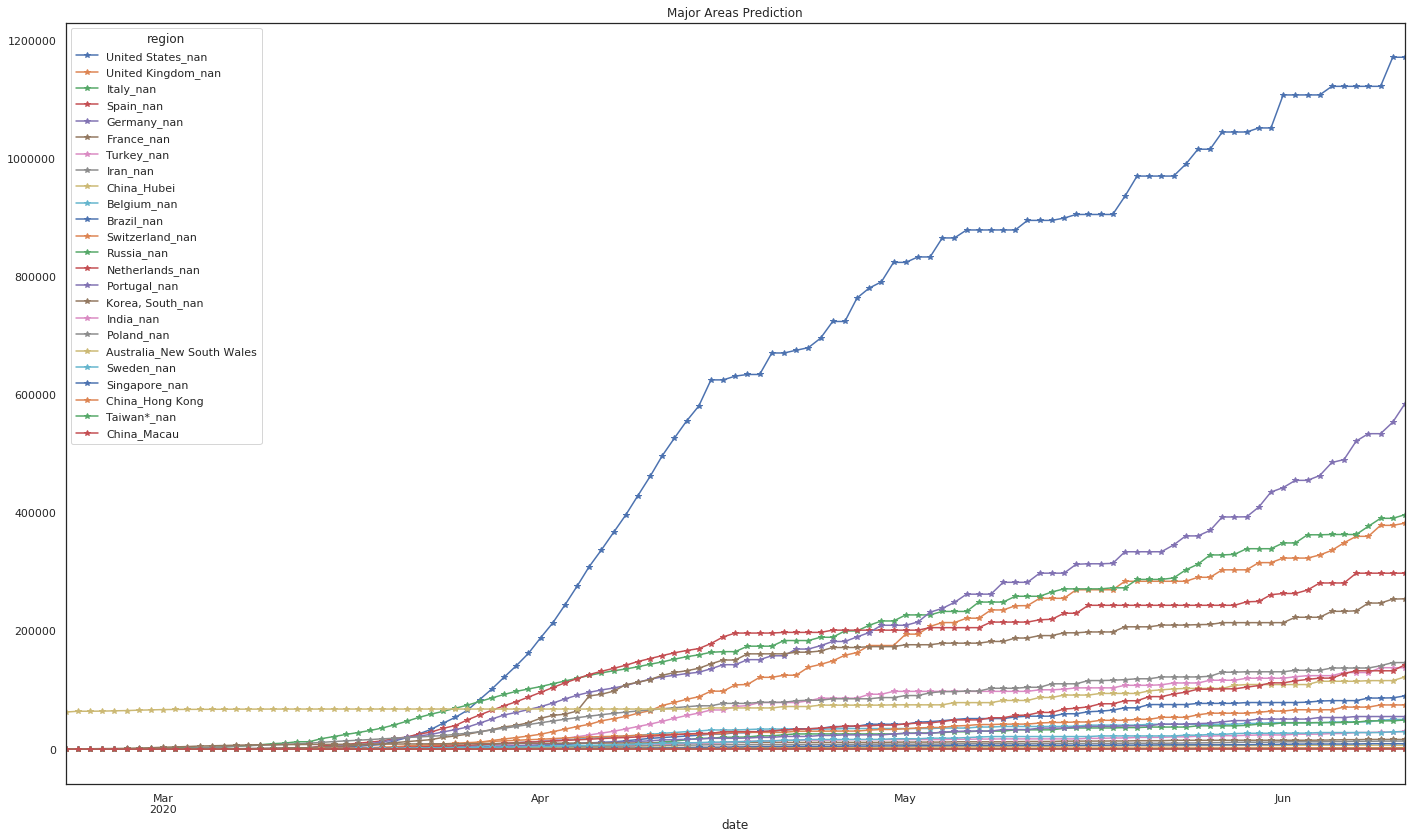

In [90]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

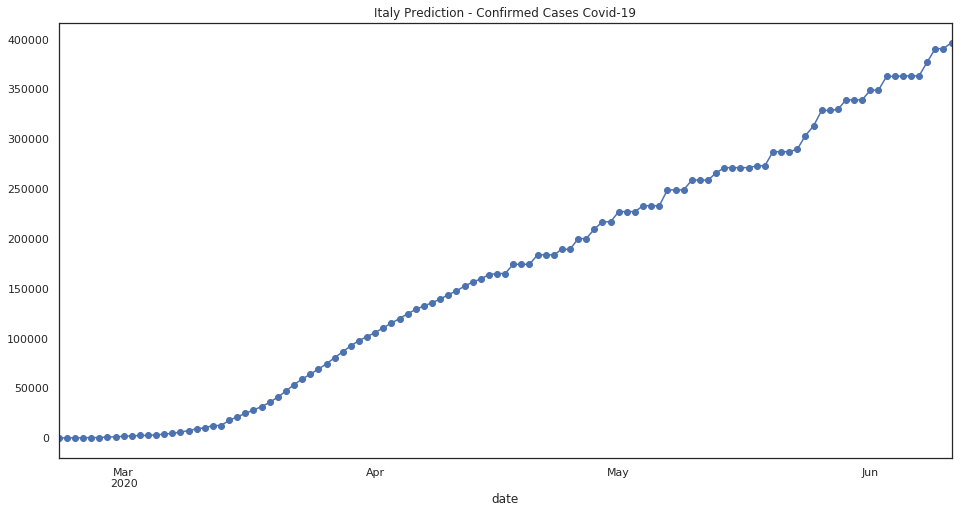

In [91]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2[2:].plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

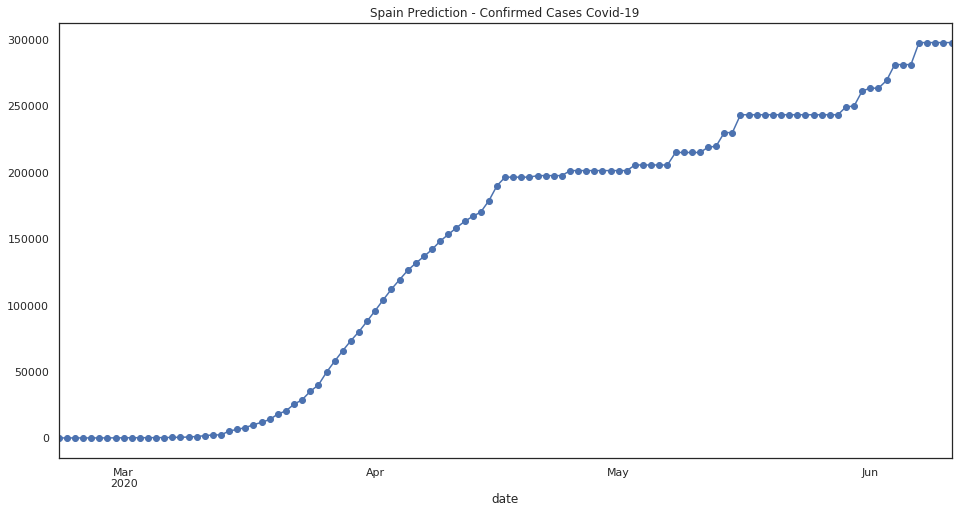

In [92]:
p3=pred['Spain_nan']
p3[2:].plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

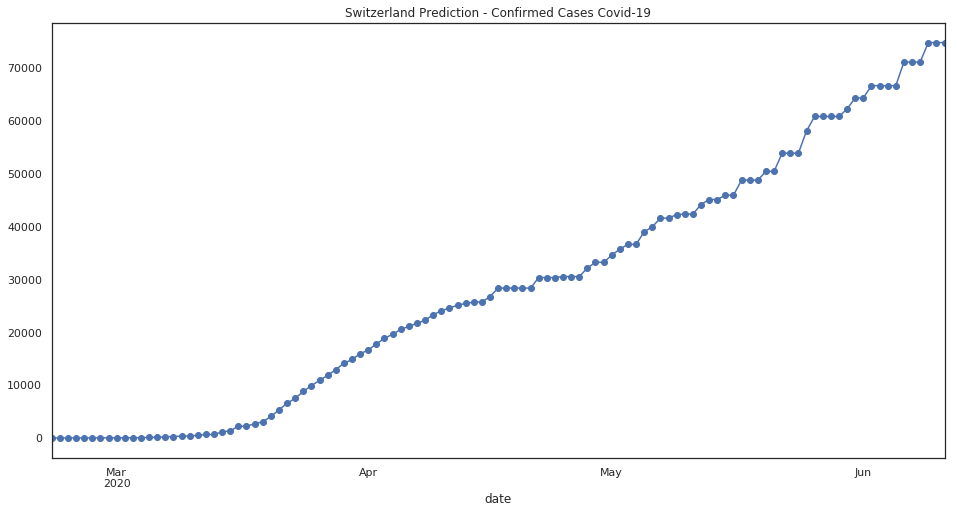

In [93]:
p4=pred['Switzerland_nan']
p4[2:].plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

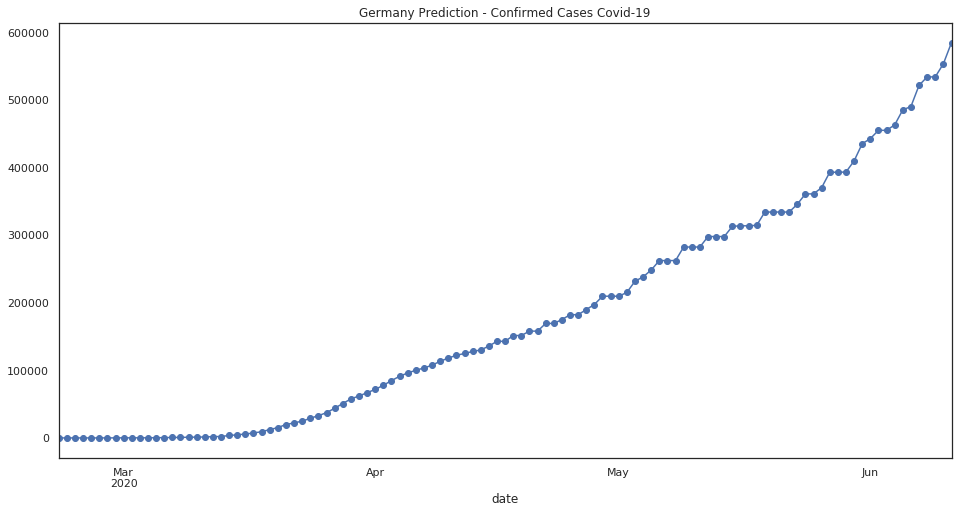

In [94]:
p5=pred['Germany_nan']
p5[2:].plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

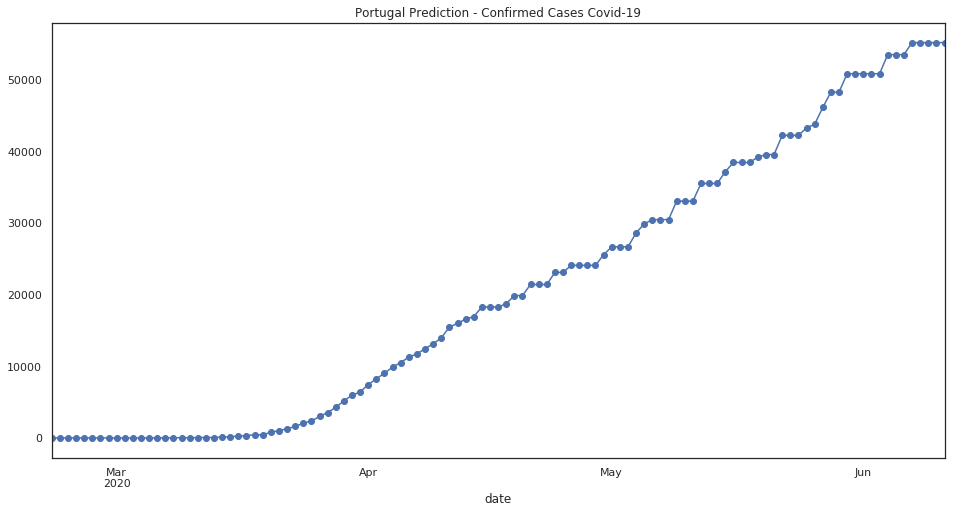

In [95]:
p6=pred['Portugal_nan']
p6[2:].plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

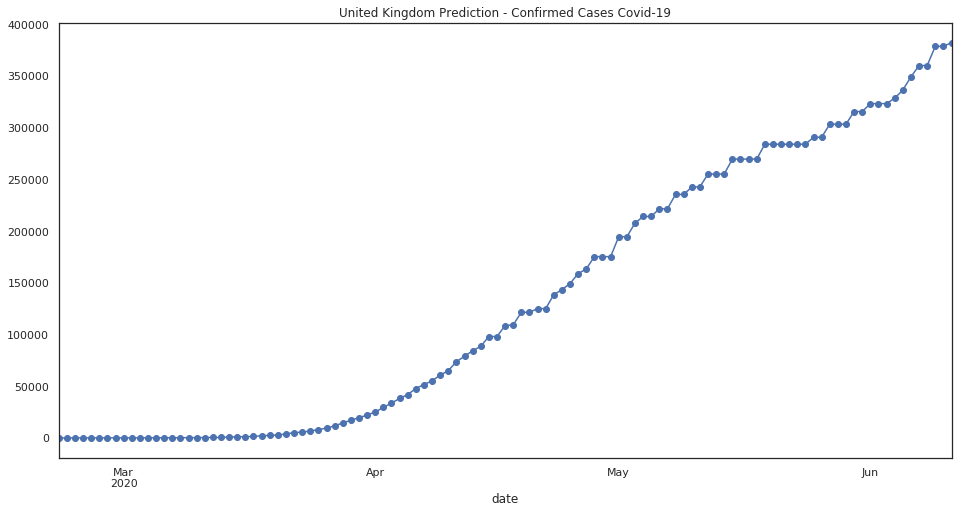

In [96]:
p8=pred['United Kingdom_nan']
p8[2:].plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

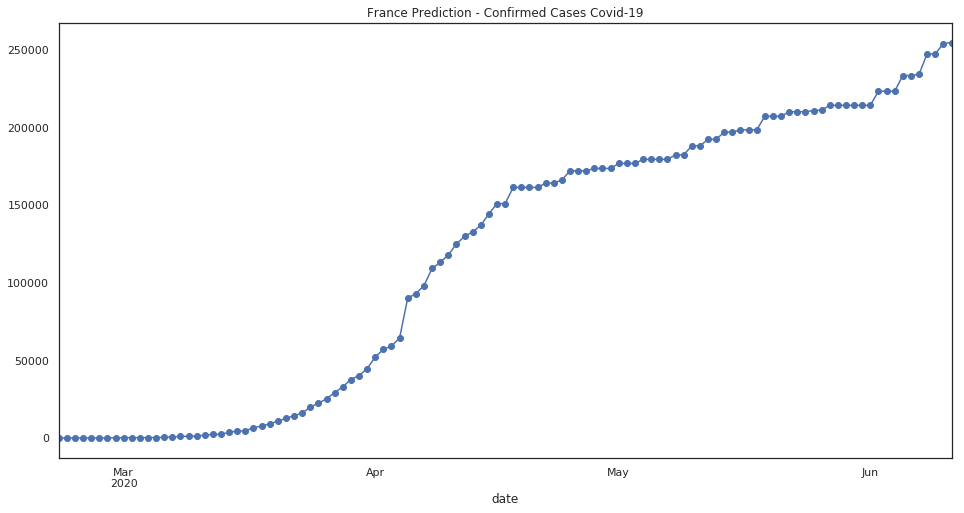

In [97]:
p9=pred['France_nan']
p9[2:].plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

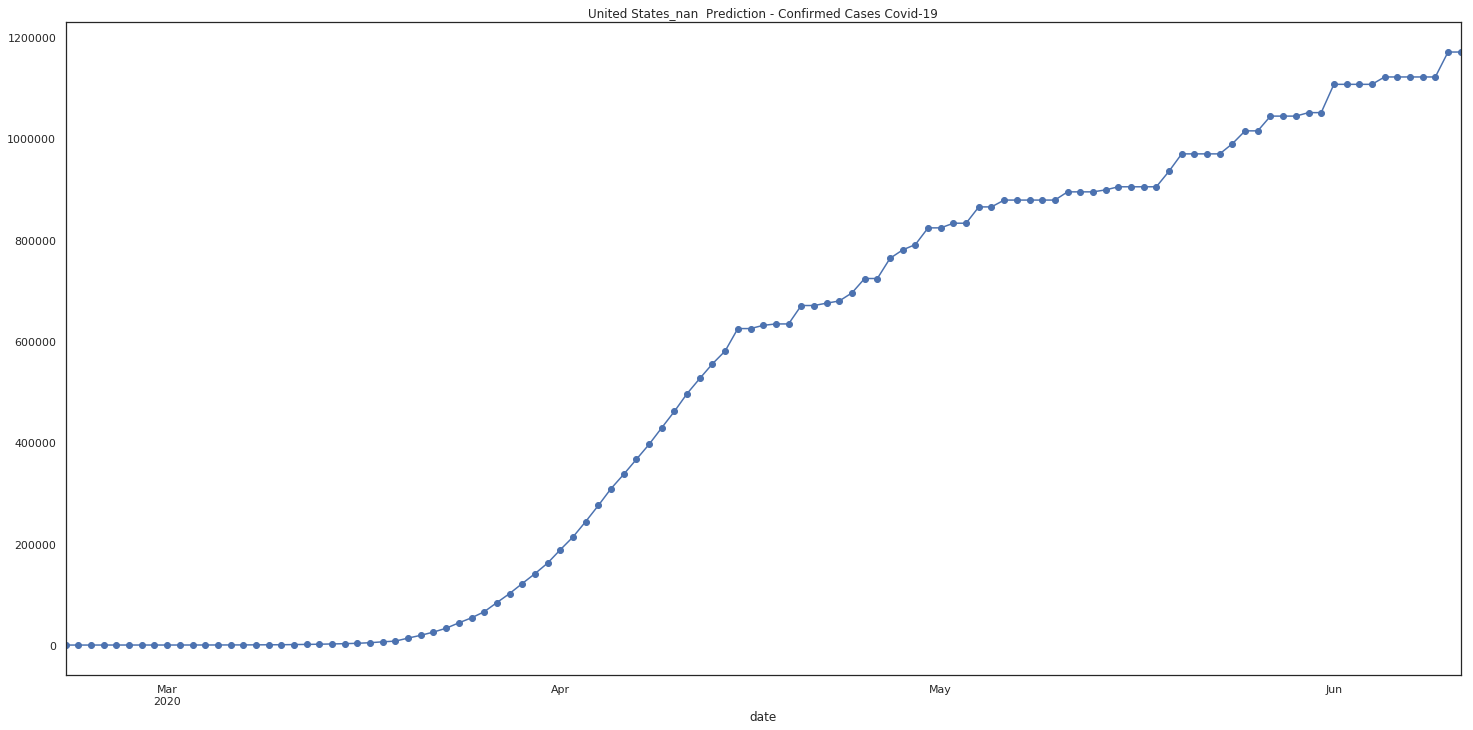

In [98]:
p10=pred['United States_nan']
p10[2:].plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

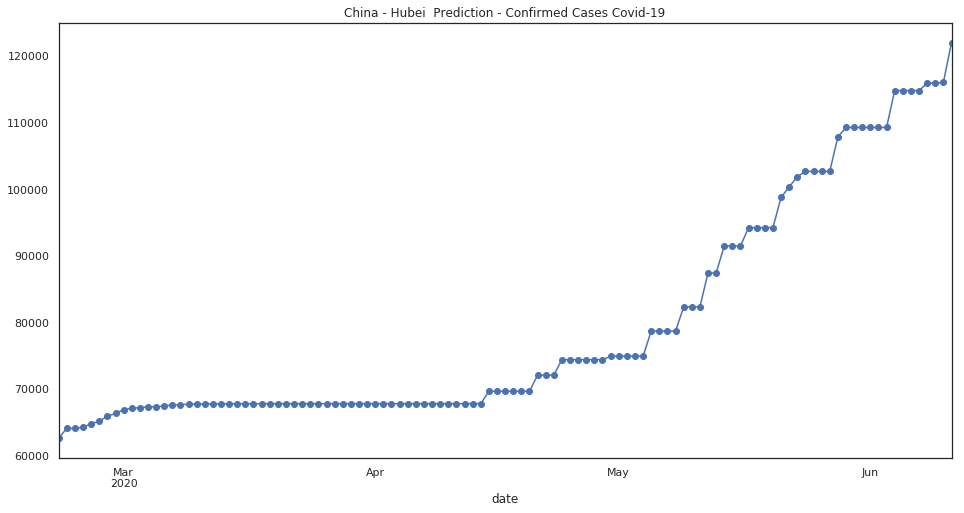

In [99]:
p11=pred['China_Hubei']
p11[2:].plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

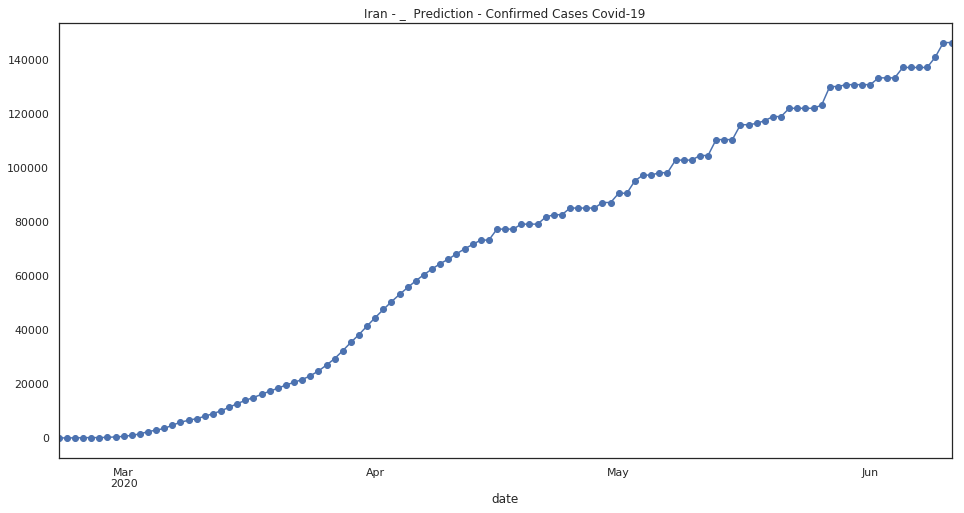

In [100]:
p12=pred['Iran_nan']
p12[2:].plot(marker='o',figsize=(16,8),title ='Iran - _  Prediction - Confirmed Cases Covid-19')

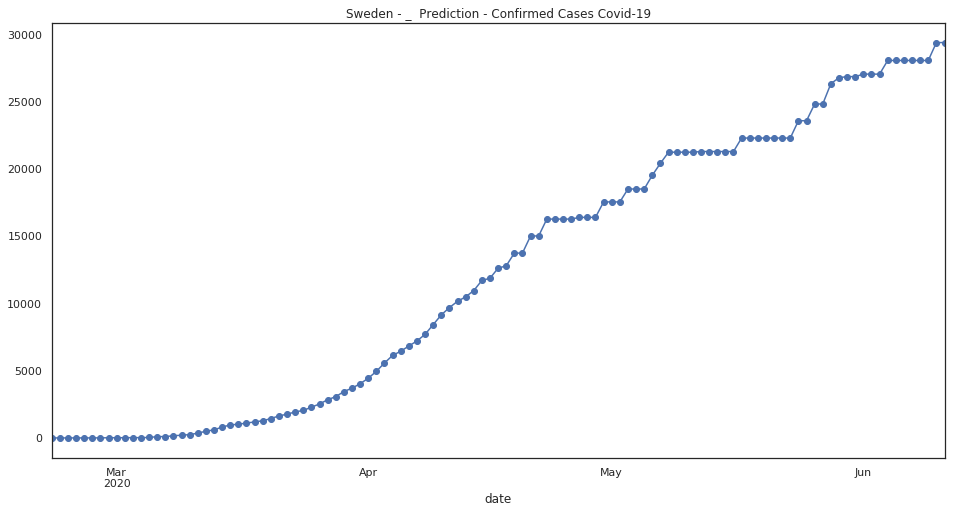

In [101]:
p13=pred['Sweden_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Sweden - _  Prediction - Confirmed Cases Covid-19')

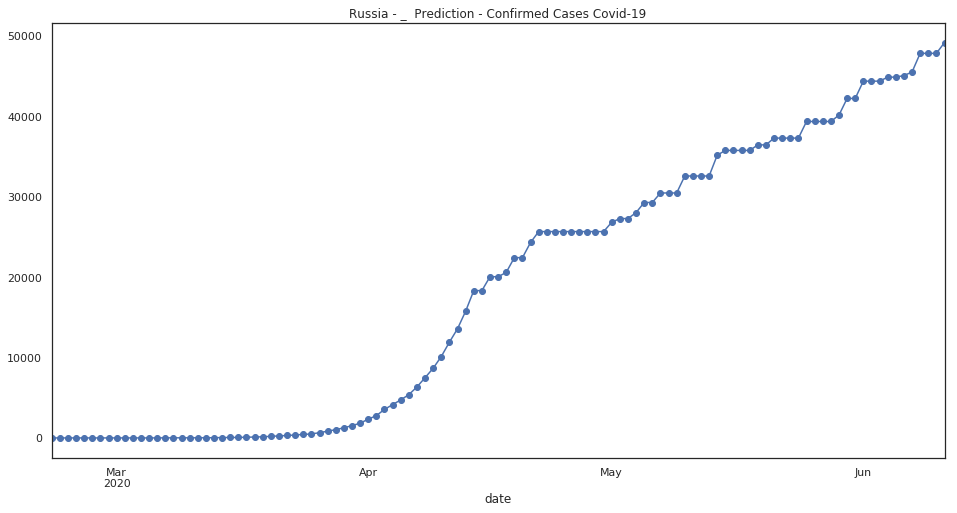

In [102]:
p13=pred['Russia_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Russia - _  Prediction - Confirmed Cases Covid-19')

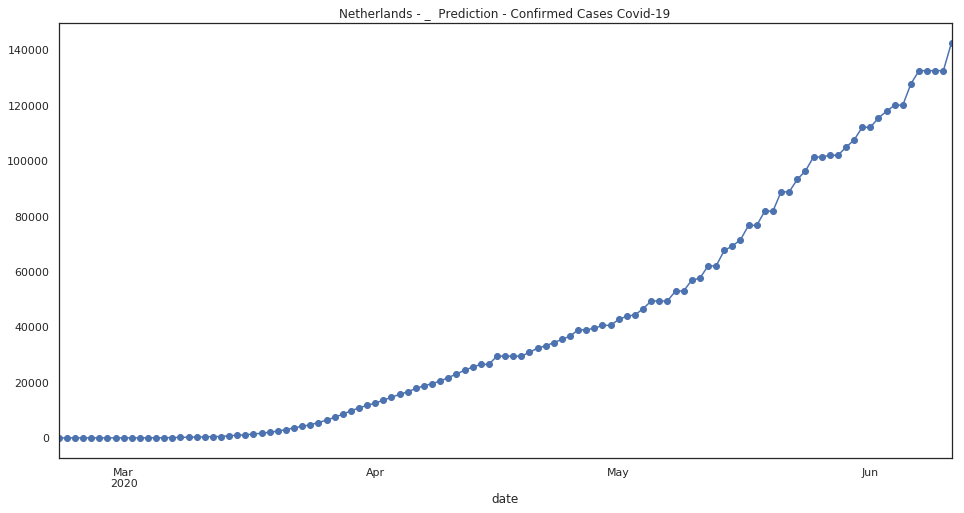

In [103]:
p14=pred['Netherlands_nan']
p14[2:].plot(marker='o',figsize=(16,8),title ='Netherlands - _  Prediction - Confirmed Cases Covid-19')

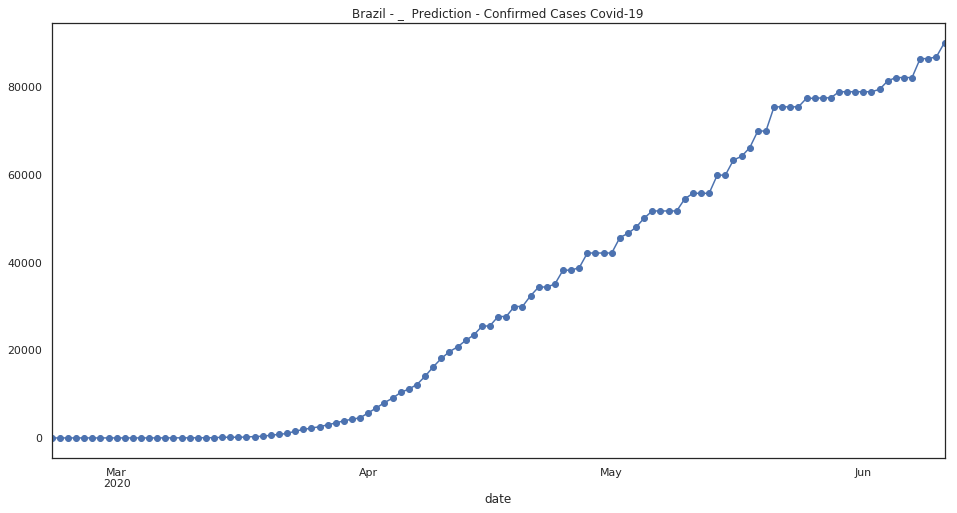

In [104]:
p15=pred['Brazil_nan']
p15[2:].plot(marker='o',figsize=(16,8),title ='Brazil - _  Prediction - Confirmed Cases Covid-19')

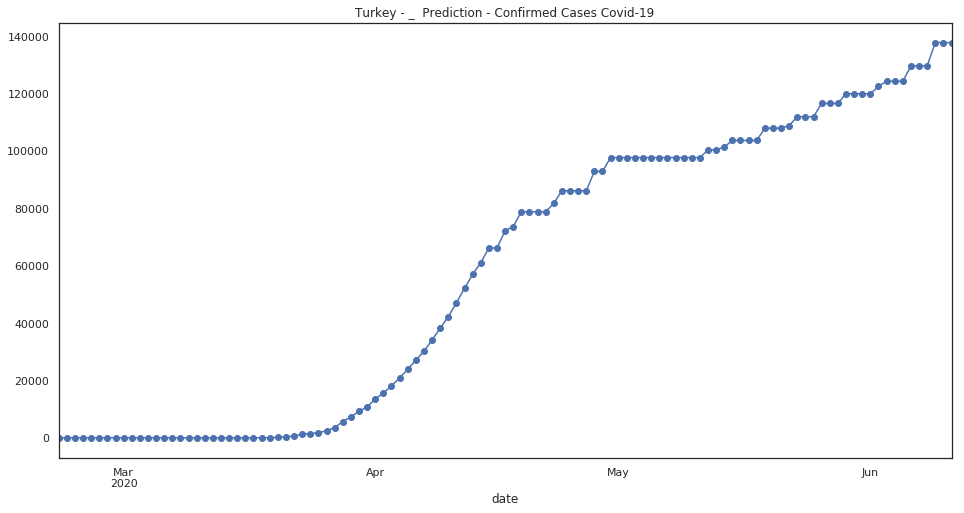

In [105]:
p15=pred['Turkey_nan']
p15[2:].plot(marker='o',figsize=(16,8),title ='Turkey - _  Prediction - Confirmed Cases Covid-19')

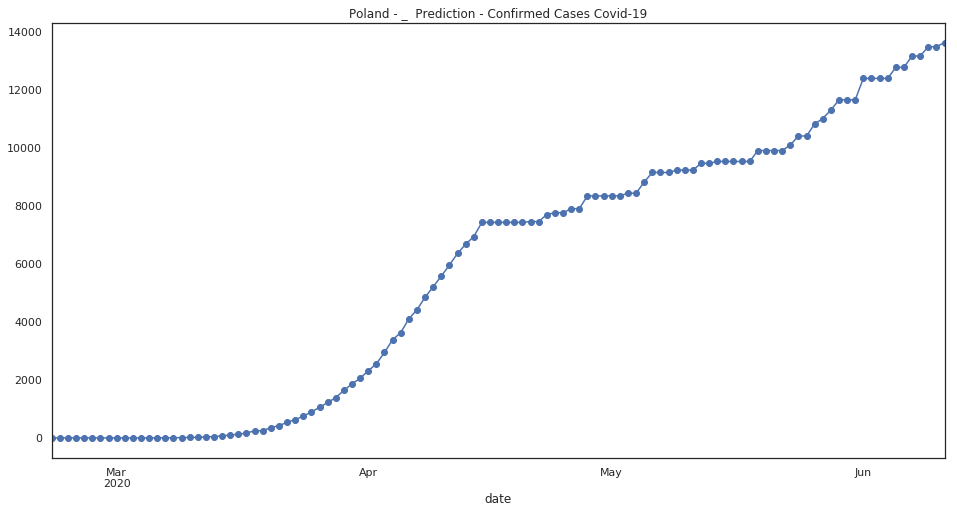

In [106]:
p15=pred['Poland_nan']
p15[2:].plot(marker='o',figsize=(16,8),title ='Poland - _  Prediction - Confirmed Cases Covid-19')

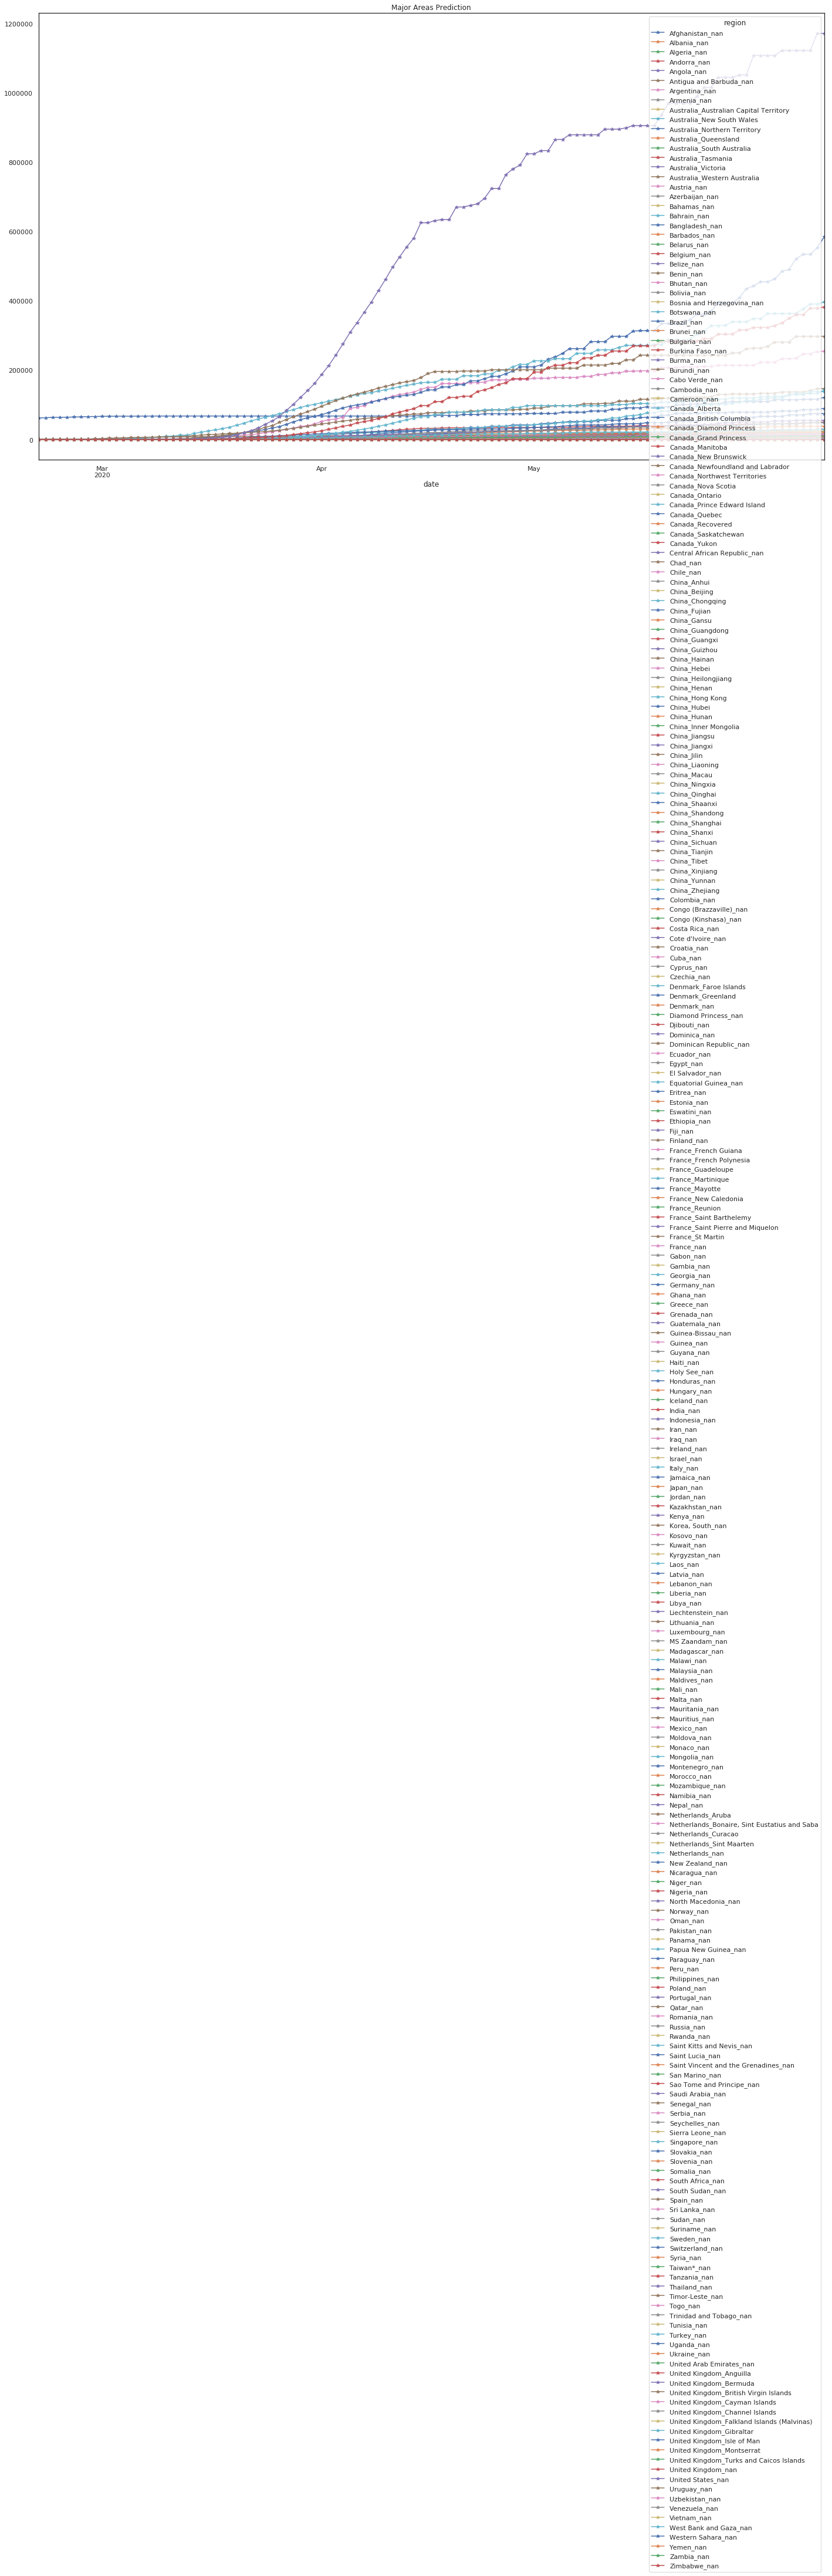

In [107]:
#region=my_train_list
pv2=pred
pv2[1:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

In [108]:
pv1=pv2[1:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [109]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-06            349.0        361.0       1320.0        501.0   
2020-04-07            367.0        377.0       1423.0        525.0   
2020-04-08            423.0        383.0       1468.0        545.0   
2020-04-09            444.0        400.0       1572.0        564.0   
2020-04-10            484.0        409.0       1666.0        583.0   
2020-04-11            521.0        416.0       1761.0        601.0   
2020-04-12            555.0        433.0       1825.0        601.0   
2020-04-13            607.0        446.0       1914.0        638.0   
2020-04-14            665.0        467.0       1983.0        646.0   
2020-04-15            722.0        467.0       1983.0        646.0   
2020-04-16            762.0        467.0       2106.0        664.0   
2020-04-17            787.0        502.0       2106.0        685.0   
2020-04-18            823.0        524.0       2202.0        685.0   
2020-04-19            823.0        524.0       2298.0        685.0   
2020-04-20            876.0        535.0       2298.0        700.0   
2020-04-21            909.0        535.0       2298.0        712.0   
2020-04-22            949.0        535.0       2298.0        751.0   
2020-04-23            949.0        542.0       2298.0        781.0   
2020-04-24           1039.0        581.0       2376.0        783.0   
2020-04-25           1092.0        581.0       2376.0        783.0   
2020-04-26           1092.0        581.0       2512.0        839.0   
2020-04-27           1092.0        581.0       2512.0        840.0   
2020-04-28           1153.0        595.0       2601.0        854.0   
2020-04-29           1233.0        595.0       2601.0        854.0   
2020-04-30           1233.0        595.0       2601.0        854.0   
2020-05-01           1233.0        595.0       2601.0        857.0   
2020-05-02           1257.0        613.0       2601.0        857.0   
2020-05-03           1278.0        619.0       2601.0        857.0   
2020-05-04           1278.0        619.0       2601.0        868.0   
2020-05-05           1278.0        619.0       2601.0        868.0   
...                     ...          ...          ...          ...   
2020-05-13           1469.0        715.0       2791.0        990.0   
2020-05-14           1469.0        715.0       2791.0       1010.0   
2020-05-15           1553.0        751.0       2791.0       1010.0   
2020-05-16           1598.0        756.0       2791.0       1068.0   
2020-05-17           1598.0        772.0       2928.0       1068.0   
2020-05-18           1657.0        800.0       2928.0       1068.0   
2020-05-19           1657.0        806.0       2928.0       1074.0   
2020-05-20           1783.0        807.0       2928.0       1074.0   
2020-05-21           1811.0        807.0       3002.0       1074.0   
2020-05-22           1888.0        807.0       3074.0       1137.0   
2020-05-23           1890.0        807.0       3074.0       1137.0   
2020-05-24           1951.0        807.0       3074.0       1192.0   
2020-05-25           1951.0        807.0       3074.0       1239.0   
2020-05-26           2019.0        846.0       3074.0       1248.0   
2020-05-27           2048.0        846.0       3074.0       1248.0   
2020-05-28           2048.0        846.0       3151.0       1248.0   
2020-05-29           2206.0        846.0       3203.0       1310.0   
2020-05-30           2298.0        846.0       3247.0       1313.0   
2020-05-31           2298.0        846.0       3309.0       1347.0   
2020-06-01           2298.0        846.0       3309.0       1397.0   
2020-06-02           2471.0        846.0       3367.0       1451.0   
2020-06-03           2603.0        862.0       3367.0       1451.0   
2020-06-04           2669.0        862.0       3523.0       1451.0   
2020-06-05           2669.0        862.0       3646.0       1451.0   
2020-06-06

In [110]:
p.to_csv('/home/notebookuser/notebooks/covid19/data/p_confirmed_daily.csv', index = False, header=True)

In [111]:

#!pip install gmplot

In [112]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [113]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [114]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
235                                Mozambique_nan -18.665695   35.529562   
236                                     Syria_nan  34.802075   38.996815   
237                               Timor-Leste_nan  -8.874217  125.727539   
238                                    Belize_nan  13.193900  -59.543200   
239                              Canada_Recovered   0.000000    0.000000   
240                                      Laos_nan  19.856270  102.495496   
241                                     Libya_nan  26.335100   17.228331   
242                        West Bank and Gaza_nan  31.952200   35.233200   
243                             Guinea-Bissau_nan  11.803700  -15.180400   
244                                      Mali_nan  17.570692   -3.996166   
245                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
246                  Canada_Northwest Territories  64.825500 -124.845700   
247                                  Canada_Yukon  64.282300 -135.000000   
248                                    Kosovo_nan  42.602636   20.902977   
249                                     Burma_nan  21.916200   95.956000   
250                       United Kingdom_Anguilla  18.220600  -63.068600   
251         United Kingdom_British Virgin Islands  18.420700  -64.640000   
252       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
253                                MS Zaandam_nan   0.000000    0.000000   
254                                  Botswana_nan -22.328500   24.684900   
255                                   Burundi_nan  -3.373100   29.918900   
256            

In [115]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=(vmaxni)-2
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:vmaxnii]]*abs(heatmap_m.iloc[i:(i+1),1:vmaxnii].astype(int)), ignore_index=True,sort=False)) 


In [116]:
### Joao - Print in datetime
from datetime import datetime
#
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
datemap=datetime.today().strftime('%Y-%m-%d')
# Generate the heatmap into an HTML file
gmap.draw("heatmaps/Heatmap-"+datemap+".html")

In [117]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [118]:
exit()

H2O session _sid_bc9d closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
